# <font color=blue size=10> 8th FLAI Machine Learning</font>

# <font color=BLUE size=12> Competition

***
**Author**: [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)
***

This is a notebook related to the FLAI MAchine Learning Competition

## Project Steps:


### 1. Problem definition
### 2. Importing the data
### 3. Understanding the data
### 4. Cleaning the data
### 5. EDA 

### 6. Preprocessing
### 7. Algorithm and model criation

### 8. Result Interpretation and model evaluation


## <font color=red>This notebook covers the EDA step - Part II

## <font color=green> 1. Problem definition

### Competition Goal:
    
    
    Get to a Classifier model with the highest F1-SCORE as possible


## <font color=green> 2. Importing the data

In [2]:
# importing the libraries

#!pip install numpy
import numpy as np # linear algebra library
#!pip install pandas
import pandas as pd
pd.set_option('display.max_colwidth', None)

# visualization libraries
#!pip install matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 12,
    "font.weight": "bold", # bold fonts
    "xtick.major.size": 5,
    "xtick.major.pad": 7,
    "xtick.labelsize": 15,  # large tick labels
    "grid.color": "0.5",    # gray gridlines
    "grid.linestyle": "-",  # solid gridlines
    "grid.linewidth": 0.5,  # thin gridlines
    "lines.linewidth": 1, # 
    "lines.color": "g",   # green lines
    "savefig.dpi": 300,     # higher resolution output.
})    
from matplotlib.gridspec import GridSpec
#!pip install seaborn
import seaborn as sns
#!pip install sweetviz
import sweetviz as sv


# Machine Learning library - Classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
#!pip install xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

#!pip install pycaret
#from pycaret.classification import *

# tree plot
from sklearn.tree import plot_tree
#!pip install graphviz==0.19.1
#!apt-get install graphviz
#from sklearn.tree import export_graphviz
#import graphviz

# validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, RepeatedKFold, KFold, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#!pip install optuna
import optuna

# transformations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # used when there are many outliers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer # the “n_quantiles” argument must be set to a value less than the number of observations in the training dataset
from sklearn.preprocessing import PowerTransformer

# Encoding
!pip install category_encoders
import category_encoders as ce  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder # transform a categorical variable into a numerical integer sorted by alphabetical order
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder # tranform a categorical target variable into a numerical integer sorted by alphabetical order

# classification taking the probability classification into account
from sklearn.preprocessing import Binarizer

# Make your own function to tranform or encode your data
from sklearn.preprocessing import FunctionTransformer
 
# Imputers
from sklearn.impute import SimpleImputer, KNNImputer 

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
# roc curves
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve


# anova testing
#!pip install scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\packaging-20.9.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [3]:
train_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/treino.csv'
test_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/teste.csv'

# importing the datasets
original_train = pd.read_csv(train_url, sep = ';', decimal = ',')
original_test = pd.read_csv(test_url, sep = ';', decimal = ',')

# copying the datsets
df_train = original_train.copy()
df_test = original_test.copy()

#### Transforming the categorical data into numerical integer values according to the turnover rate

In [4]:
dict_turnover = {'SIM': 1, 
                 'NAO': 0}

df_train['turnover_apos_1_ano'] = df_train['turnover_apos_1_ano'].map(dict_turnover)


In [5]:
dict_sexo = {'FEMININO': 1, 
                 'MASCULINO': 0}

df_train['func_sexo'] = df_train['func_sexo'].map(dict_sexo)
df_test['func_sexo'] = df_test['func_sexo'].map(dict_sexo)


In [6]:
dict_racacor = {'SEM INFO': 0, 
                'PRETA-PARDA': 1, 
                'AMARELA-BRANCA':2, 
                'INDIGENA':3}

df_train['func_racacor'] = df_train['func_racacor'].map(dict_racacor)
df_test['func_racacor'] = df_test['func_racacor'].map(dict_racacor)


In [7]:
dict_escolar = {'ANALFABETO-FUND_INCOMPLETO': 1, 
                'FUND_COMPLETO-MEDIO_INCOMPLETO': 2, 
                'MEDIO COMPLETO':3, 
                'SUPERIOR_INCOMPLETO':4,
                'SUPERIOR_COMPLETO':5}

df_train['func_escolaridade'] = df_train['func_escolaridade'].map(dict_escolar)
df_test['func_escolaridade'] = df_test['func_escolaridade'].map(dict_escolar)


In [8]:
df_train.contrato_salario = df_train.contrato_salario/1000
df_test.contrato_salario = df_test.contrato_salario/1000

In [9]:
states_latlong = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/estados.csv')
states_latlong = states_latlong.rename(columns = {'uf': 'func_uf'})
states_latlong = states_latlong[['func_uf', 'latitude', 'longitude']]
df_states = df_train.copy()
df_states = df_states.merge(states_latlong, on = 'func_uf')

In [10]:
dict_uf = {'MA': 1,
           'AL': 2,
           'PI': 3,
           'CE': 4,
           'BA': 5,
           'RN': 6,
           'SE': 7,
           'PB': 8,
           'PE': 9
          }
           
df_train['func_uf'] = df_train['func_uf'].map(dict_uf)
df_test['func_uf'] = df_test['func_uf'].map(dict_uf)


In [11]:
dict_deficiencia = {'SIM': 1, 
                    'NAO': 0}

df_train['func_deficiencia'] = df_train['func_deficiencia'].map(dict_deficiencia)
df_test['func_deficiencia'] = df_test['func_deficiencia'].map(dict_deficiencia)


In [12]:
dict_porte = {'ATE 4': 1,
              'DE 5 A 9': 2,
              'DE 10 A 19': 3,
              'DE 20 A 49': 4,                   
              'DE 50 A 99': 5,
              'DE 100 A 249': 6,
              'DE 250 A 499': 7,
              'DE 500 A 999': 8,
              '1000 OU MAIS': 9
             }

df_train['empresa_porte'] = df_train['empresa_porte'].map(dict_porte)
df_test['empresa_porte'] = df_test['empresa_porte'].map(dict_porte)


In [13]:
dict_setor = {'Agricultura': 1,
              'Construçao civil': 2,
              'Comércio': 3,
              'Indústria': 4,
              'Serviços': 5,
              'Administraçao pública': 6
             }

df_train['empresa_setor'] = df_train['empresa_setor'].map(dict_setor)
df_test['empresa_setor'] = df_test['empresa_setor'].map(dict_setor)


In [14]:
# function to reverse the dict: turn keys to values and values to keys 
def reverse_dict(dic):
    reverse_dic = dict()
    for key in dic:
        val = dic[key]
        reverse_dic[val] = key
    return reverse_dic

# another way to do it:
# inverse_dict = {v: k for k, v in dic.items()}


## <font color=green>Evaluating the features</font>
***
- First the numerical ones
- Then the ordinal
- Finally, the categorical variables

In [32]:
from matplotlib.gridspec import GridSpec

def distribution_plot(column, title, color='deepskyblue'): # from: https://www.kaggle.com/code/galaxygeorge/customer-churn-modeling-eda-fe-model#EDA-+-FE:-Exploratory-Data-Analysis-and-Feature-Engineering

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, kde=True, 
                 stat="density", color=color, 
                )

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color, 
               )
    print(f'Skewness for {title} =======>>> {column.skew():.3f}')

## 1º Numerical Features

## <font color=blue> 1. EDA - contrato_salario

### 1.1 Distribution

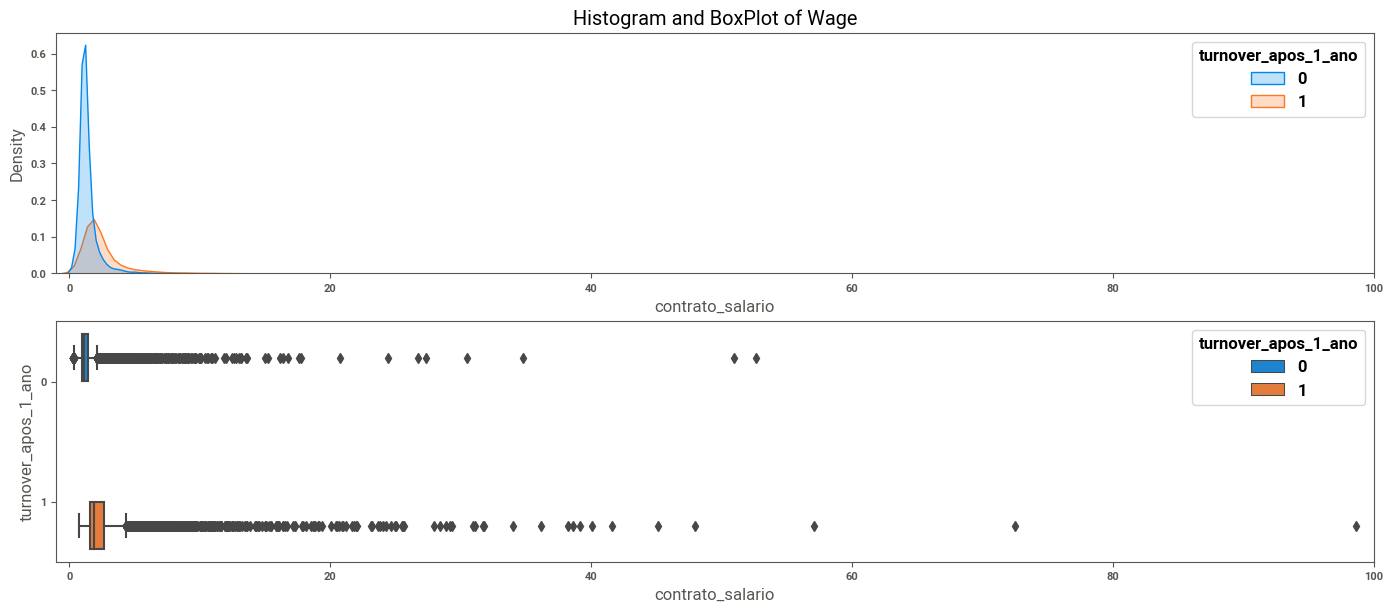

In [64]:

fig = plt.figure(figsize=(17, 7))
grid = GridSpec(nrows=2, ncols=1, figure=fig)

ax0 = fig.add_subplot(grid[0, :])
ax0.set_title('Histogram and BoxPlot of Wage')
sns.kdeplot(data=df_train, x="contrato_salario", hue="turnover_apos_1_ano", multiple="layer", 
           fill=True, ax=ax0
           )
ax0.set_xlim(left=-1, right=100)
ax1 = fig.add_subplot(grid[1, :])
#plt.axis('off')
sns.boxplot(data=df_train, x = df_train.contrato_salario, y = 'turnover_apos_1_ano', 
                 hue = 'turnover_apos_1_ano', 
            orient="h",ax=ax1)
ax1.set_xlim(left=-1, right=100)
plt.show()

* Looking at the distribution of the feature wage, there is a difference between churn and non-churn data. Non-churn data tend to be exponentially distributed while Churn data appear to be more normally distributed. It can be proven by their Skewness.
* It can also be highlighted that there is a difference in their medians

Skewness for Wage =======>>> 12.339
Skewness for Wage - No Churn =======>>> 14.971
Skewness for Wage - Churn =======>>> 9.698


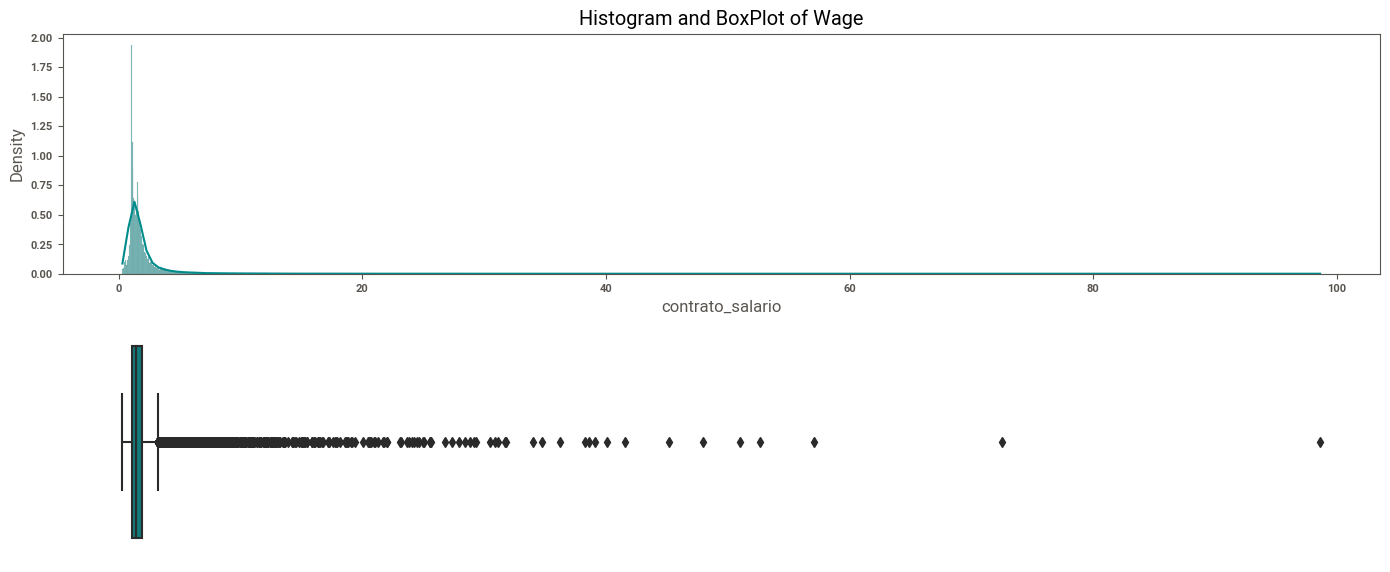

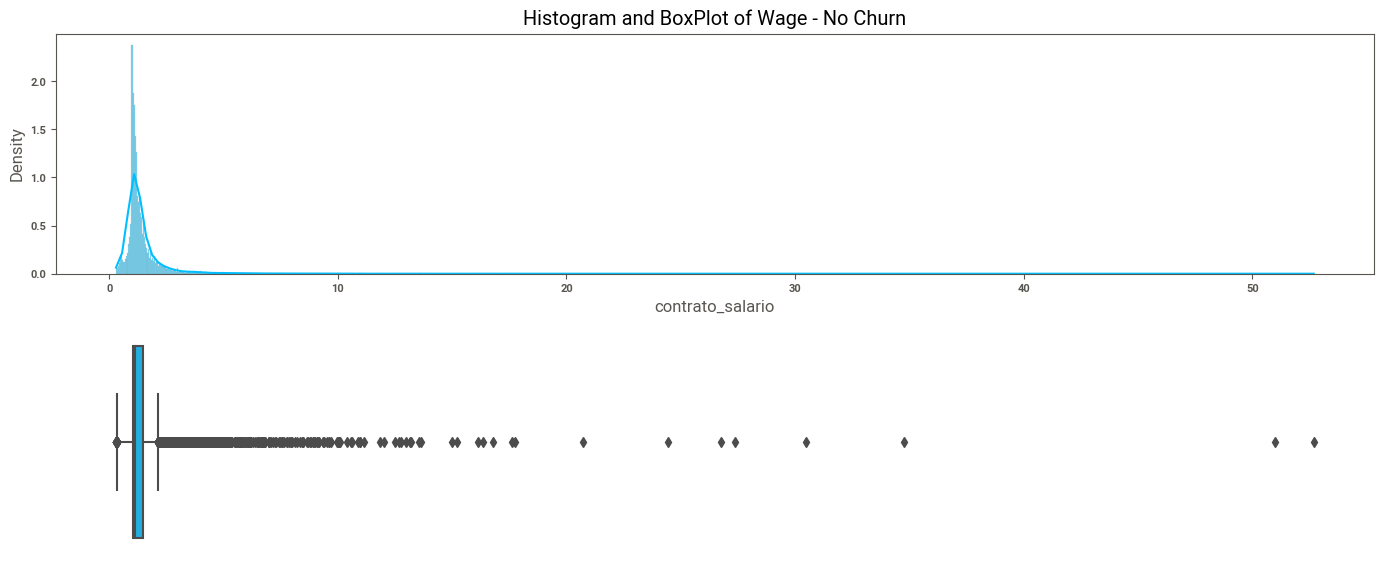

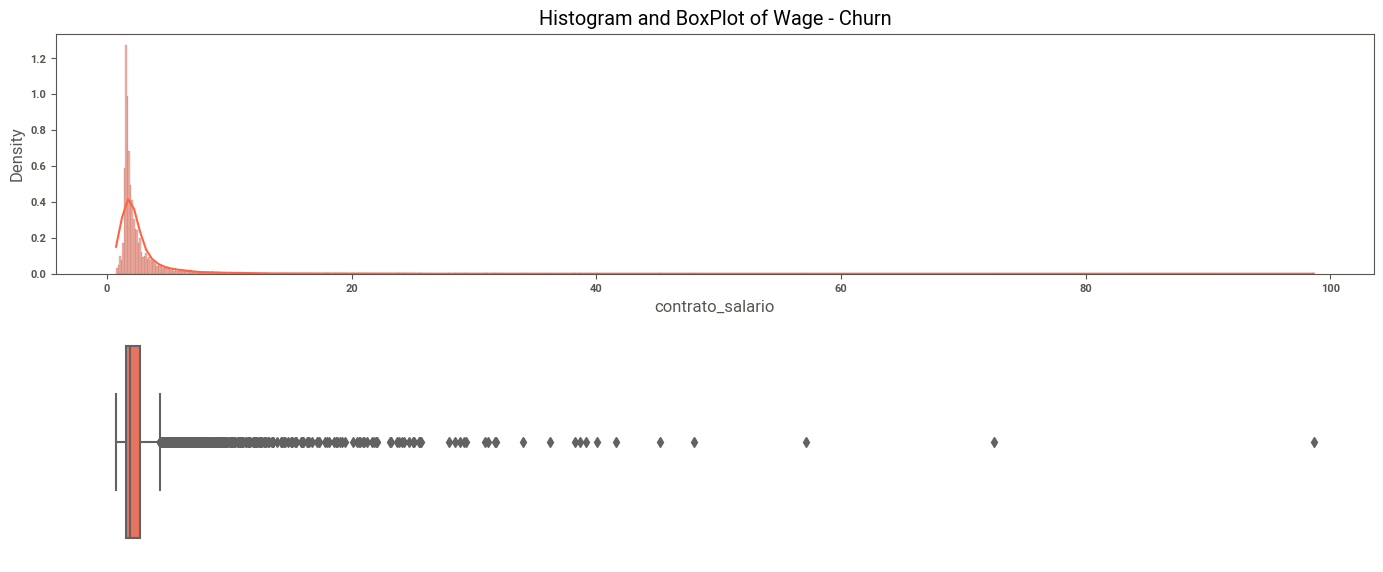

In [65]:
distribution_plot(df_train.contrato_salario, 'Wage', color='darkcyan')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==0].contrato_salario, 'Wage - No Churn')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==1].contrato_salario, 'Wage - Churn', color='tomato')

(-1.0, 100.0)

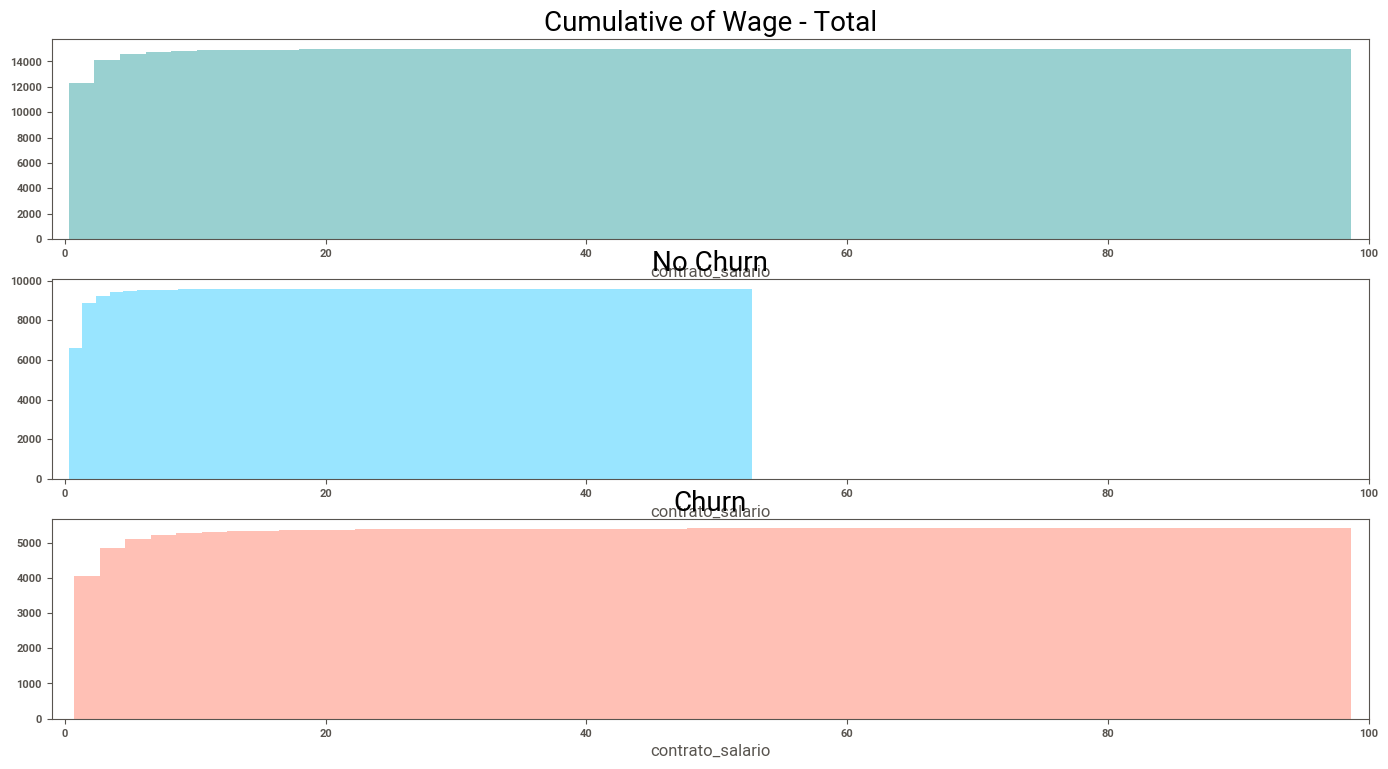

In [76]:
fig = plt.figure(figsize=(17, 9))
grid = GridSpec(nrows=3, ncols=1, figure=fig)

ax0 = fig.add_subplot(grid[0, :])
ax0.set_title(f'Cumulative of Wage - Total', fontsize=20)
#plt.axis('off')
sns.distplot(df_train.contrato_salario, 
                  hist_kws = {'cumulative':True}, 
             kde=False,
                  #kde_kws = {'cumulative':True},
                  color='darkcyan')
ax0.set_xlim(left=-1, right=100)

ax1 = fig.add_subplot(grid[1, :])

sns.distplot(df_train.loc[df_train.turnover_apos_1_ano==0].contrato_salario, 
                  hist_kws = {'cumulative':True}, 
             kde=False,
                  #kde_kws = {'cumulative':True},
                  color='deepskyblue'
            ) \
                 .set_title(f'No Churn', fontsize=20)
    
ax1.set_xlim(left=-1, right=100)

ax2 = fig.add_subplot(grid[2, :])

sns.distplot(df_train.loc[df_train.turnover_apos_1_ano==1].contrato_salario, 
                  hist_kws = {'cumulative':True}, 
             kde=False,
                  #kde_kws = {'cumulative':True}, 
                  color='tomato'
            ) \
                 .set_title(f'Churn', fontsize=20)

ax2.set_xlim(left=-1, right=100)  


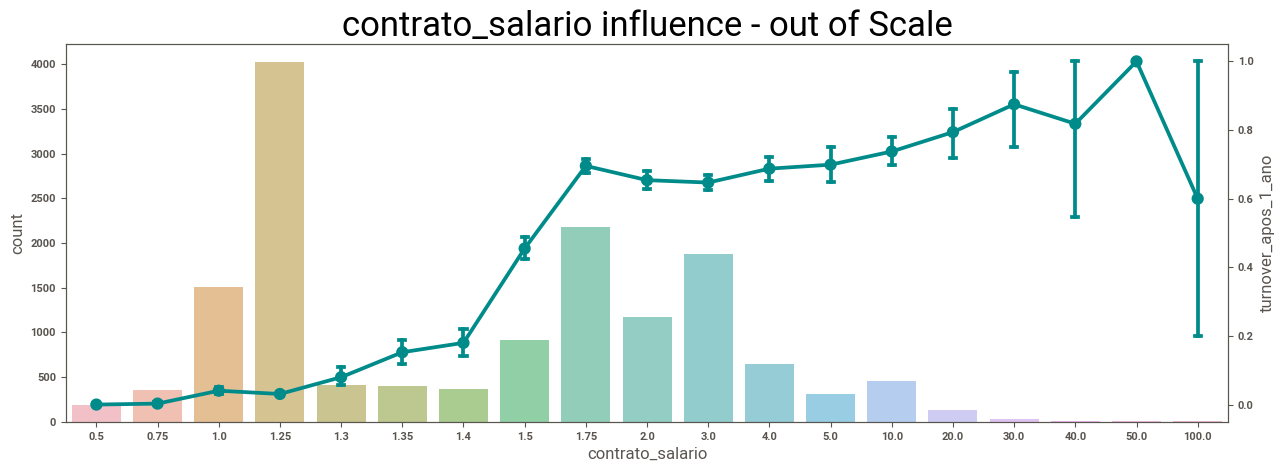

In [77]:
def wage_plot(data, color = 'darkcyan', hue = None): 
    
    col_name = 'contrato_salario'
    wage_data = data[[col_name, 'turnover_apos_1_ano']]
    wage_data[col_name] = pd.cut(wage_data[col_name],
                               bins=[0, 0.5, 0.75, 1, 1.25,1.3,1.35, 1.4, 1.5,1.75, 2, 3, 4, 5,  10, 20, 30, 40 , 50, 100],
                               labels=[0.5, 0.75, 1, 1.25, 1.3,1.35,1.4, 1.5, 1.75, 2, 3, 4,  5, 10, 20, 30, 40 , 50, 100])

    ax1 = sns.set_style(style=None, rc=None)

    fig, ax1 = plt.subplots(figsize=(15,5))

    sns.countplot(x=col_name, data=wage_data, ax=ax1, alpha=0.6)     \
                 .set_title(f'{col_name} influence - out of Scale', fontsize=25)
    
    ax2 = ax1.twinx()
    
    sns.pointplot(x=col_name, y='turnover_apos_1_ano',
                  dodge=0.1, capsize=.1, data=wage_data, color=color, hue=hue, row=hue, ax=ax2)

    
wage_plot(df_train)


#### OBS
* From this graph, some patterns can be observed.
 - It can be seen that most employees with lower wages remain in the company while thoses with higher income tend to leave more often.
 - There is a similarity when wage is below 1.25K. 
 - There is a higher variance when wage is above 30K (this could be due to the lower count)
 - when the wage is between 1.75K and 20K there is a similarity in the churn rate

### 1.2. ANOVA to compare groups of wages

In [78]:
# ANOVA to compare the group of people that receive a wage higher than 20K and when it´s bigger than 30K
df_anova = pd.DataFrame(stats.f_oneway(df_train.loc[df_train.contrato_salario >30],
              df_train.loc[df_train.contrato_salario > 20])[1],
             index = df_train.columns,
                       columns = ['p_value'])

def func_anova(x):
    if x >= 0.05:
        return '='
    else:
        return 'distinct'


df_anova['ANOVA'] = df_anova['p_value'].map(func_anova)
df_anova

,p_value,ANOVA
func_sexo,0.353537,=
func_idade,0.634753,=
func_racacor,0.514150,=
func_escolaridade,0.260213,=
func_uf,0.668505,=
func_deficiencia,0.900204,=
empresa_porte,0.896820,=
empresa_setor,0.360352,=
contrato_horastrabalho,0.689994,=
contrato_salario,0.002504,distinct


* Based on the ANOVA test above, it can be concluded that there are no evidences that there is a difference. Therefore, it can established a maximum wage of 20K.

In [79]:
# ANOVA to compare the group of people that receive a wage higher than 20K and when it´s bigger than 30K
df_anova = pd.DataFrame(stats.f_oneway(df_train.loc[df_train.contrato_salario > 20],
              df_train.loc[df_train.contrato_salario >= 15])[1],
             index = df_train.columns,
                       columns = ['p_value'])

def func_anova(x):
    if x >= 0.05:
        return '='
    else:
        return 'distinct'


df_anova['ANOVA'] = df_anova['p_value'].map(func_anova)
df_anova

,p_value,ANOVA
func_sexo,0.337528,=
func_idade,0.430491,=
func_racacor,0.889152,=
func_escolaridade,0.748993,=
func_uf,0.630310,=
func_deficiencia,0.761955,=
empresa_porte,0.318592,=
empresa_setor,0.828950,=
contrato_horastrabalho,0.317215,=
contrato_salario,0.013708,distinct


* Based on the ANOVA test above, it can be concluded that there are no evidences that there is a difference. Therefore, it can established a maximum wage of 15K.

In [80]:
# ANOVA to compare the group of people that receive a wage smaller than 0.5K and when it´s lower than 0.75K
df_anova = pd.DataFrame(stats.f_oneway(df_train.loc[df_train.contrato_salario <= 0.5],
              df_train.loc[df_train.contrato_salario <= 0.75])[1],
             index = df_train.columns,
                       columns = ['p_value'])

def func_anova(x):
    if x >= 0.05:
        return '='
    else:
        return 'distinct'


df_anova['ANOVA'] = df_anova['p_value'].map(func_anova)
df_anova

,p_value,ANOVA
func_sexo,6.336255e-01,=
func_idade,2.430052e-01,=
func_racacor,8.640675e-01,=
func_escolaridade,5.951802e-01,=
func_uf,6.999099e-01,=
func_deficiencia,2.366352e-01,=
empresa_porte,4.526602e-01,=
empresa_setor,8.299659e-01,=
contrato_horastrabalho,2.901475e-02,distinct
contrato_salario,1.127580e-41,distinct


* Analyzing the ANOVA, it can be seen that the only difference in the test is shown in the working hours feature

In [81]:
# ANOVA when wage is lower than 1.25K : Comparing the Churn and No Churn
df_anova = df_train.loc[df_train.contrato_salario <= 1.25]
df_anova = pd.DataFrame(stats.f_oneway(df_anova.loc[df_train.turnover_apos_1_ano == 0],
              df_anova.loc[df_anova.turnover_apos_1_ano == 1])[1],
             index = df_train.columns,
                       columns = ['p_value'])

def func_anova(x):
    if x >= 0.05:
        return '='
    else:
        return 'distinct'


df_anova['ANOVA'] = df_anova['p_value'].map(func_anova)
df_anova

,p_value,ANOVA
func_sexo,6.112978e-04,distinct
func_idade,2.808188e-01,=
func_racacor,1.665415e-01,=
func_escolaridade,2.053335e-24,distinct
func_uf,3.443956e-03,distinct
func_deficiencia,8.140732e-01,=
empresa_porte,5.393956e-03,distinct
empresa_setor,2.315541e-11,distinct
contrato_horastrabalho,6.300464e-97,distinct
contrato_salario,1.080021e-02,distinct


In [134]:
df_train.loc[(df_train.contrato_salario<=1.25) & (df_train.turnover_apos_1_ano ==1)].empresa_setor.value_counts(normalize=True)

5    0.758065
3    0.145161
4    0.053763
1    0.032258
2    0.010753
Name: empresa_setor, dtype: float64

In [130]:
df_train.loc[(df_train.contrato_salario<=1.25) & (df_train.turnover_apos_1_ano ==1)].func_racacor.value_counts(normalize=True)

1    0.688172
2    0.161290
0    0.150538
Name: func_racacor, dtype: float64

#### OBS
- It can be noted that when wage is lower than 1.25K and the person churned, the majority of people works in the company sector 5 (Serviços), and has a race of 1. Also, work hours per week (contrato_horastrabalho) are smaller in that group

### 1.3. Analyzing the LOG of wage

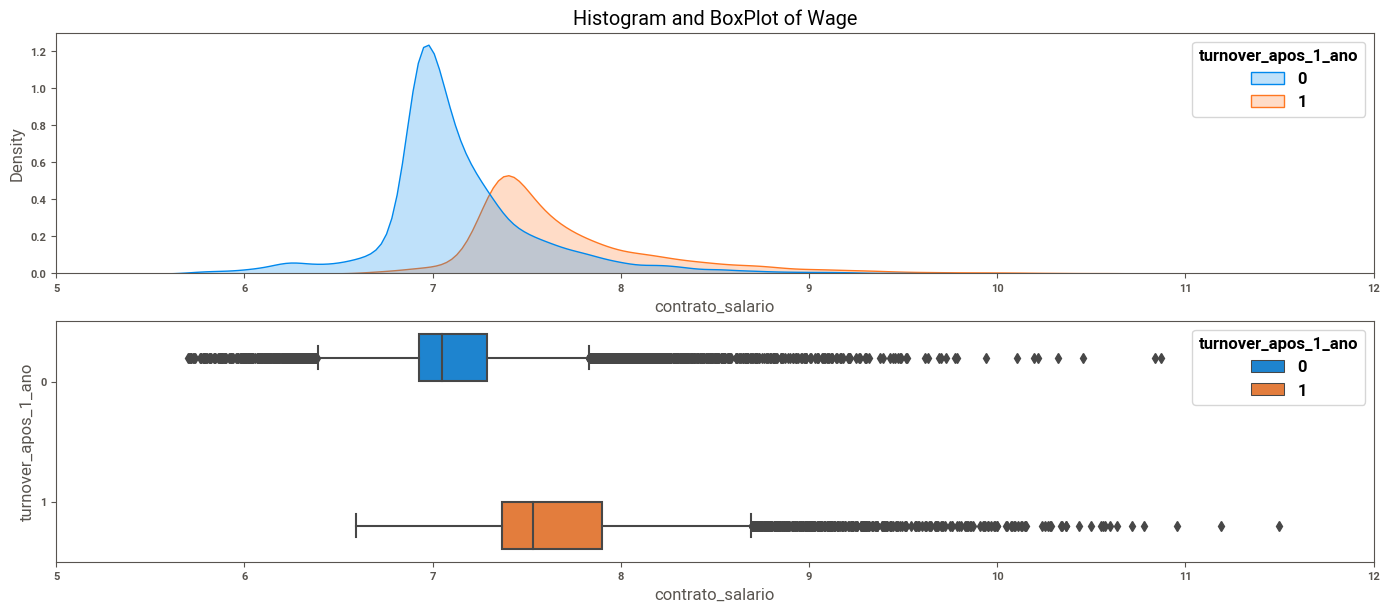

In [85]:
fig = plt.figure(figsize=(17, 7))
grid = GridSpec(nrows=2, ncols=1, figure=fig)

ax0 = fig.add_subplot(grid[0, :])
ax0.set_title('Histogram and BoxPlot of Wage')
sns.kdeplot(data=df_train, x=np.log(df_train.contrato_salario * 1000), hue="turnover_apos_1_ano", multiple="layer", 
           fill=True, ax=ax0
           )
ax0.set_xlim(left=5, right=12)
ax1 = fig.add_subplot(grid[1, :])
#plt.axis('off')
sns.boxplot(data=df_train, x = np.log(df_train.contrato_salario * 1000), y = 'turnover_apos_1_ano', 
                 hue = 'turnover_apos_1_ano', 
            orient="h",ax=ax1)
ax1.set_xlim(left=5, right=12)
plt.show()

Skewness for Log Wage =======>>> 2.416
Skewness for Log Wage - No Churn =======>>> 2.843
Skewness for Log Wage - Churn =======>>> 2.390


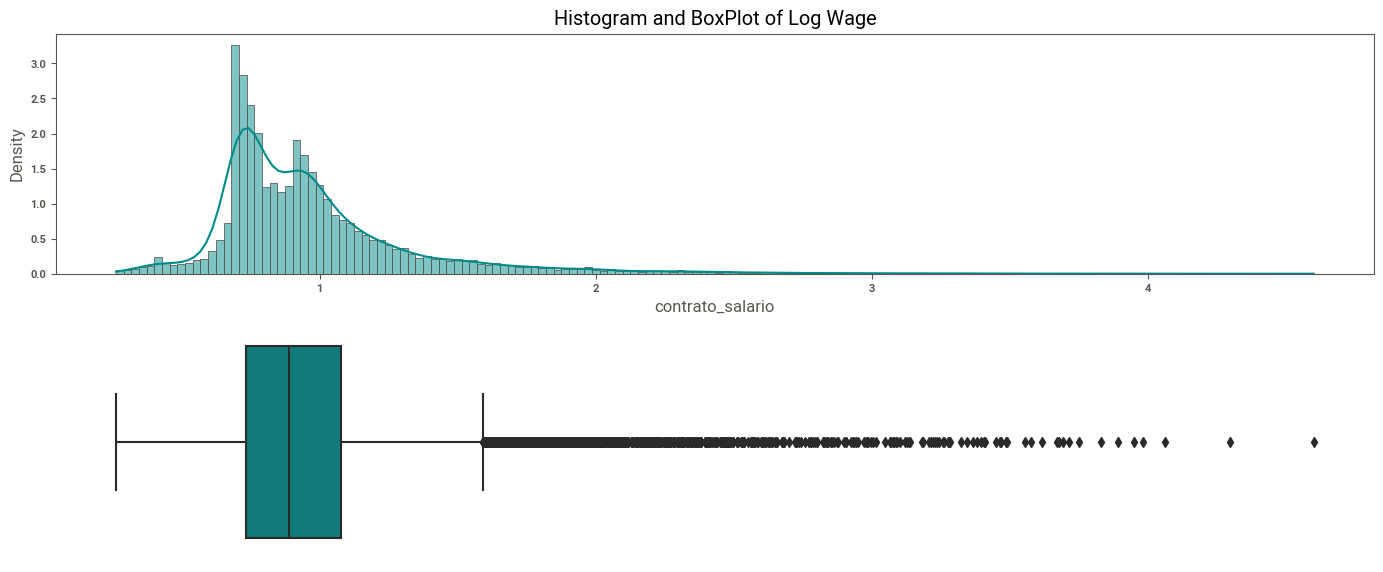

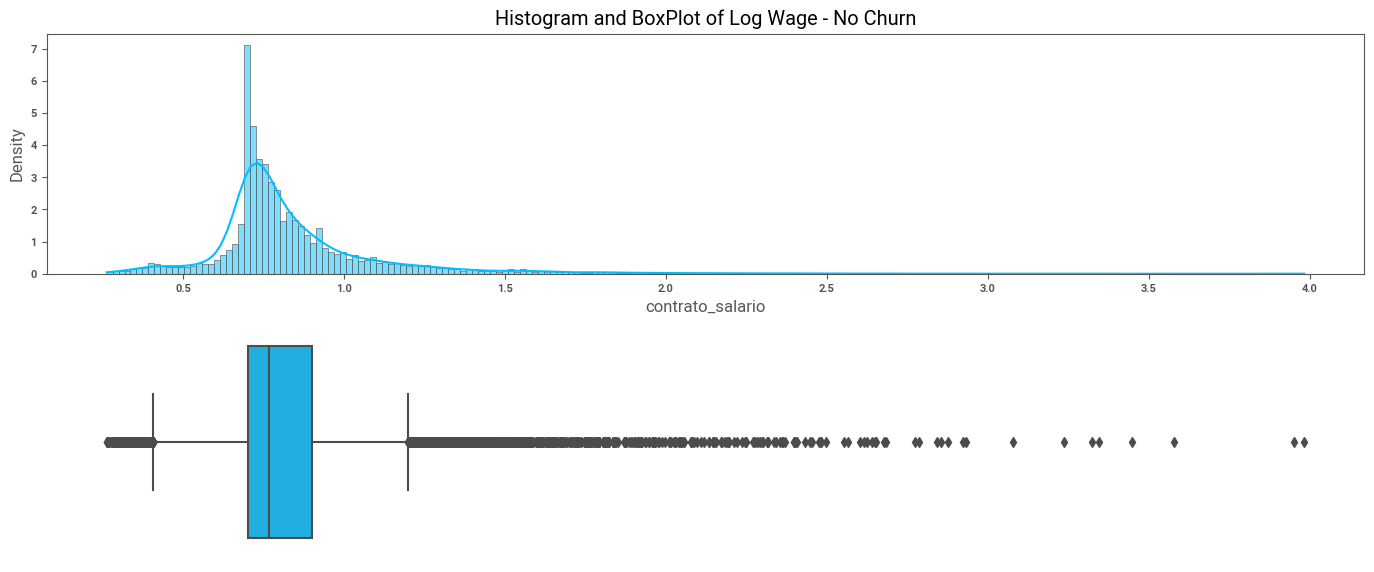

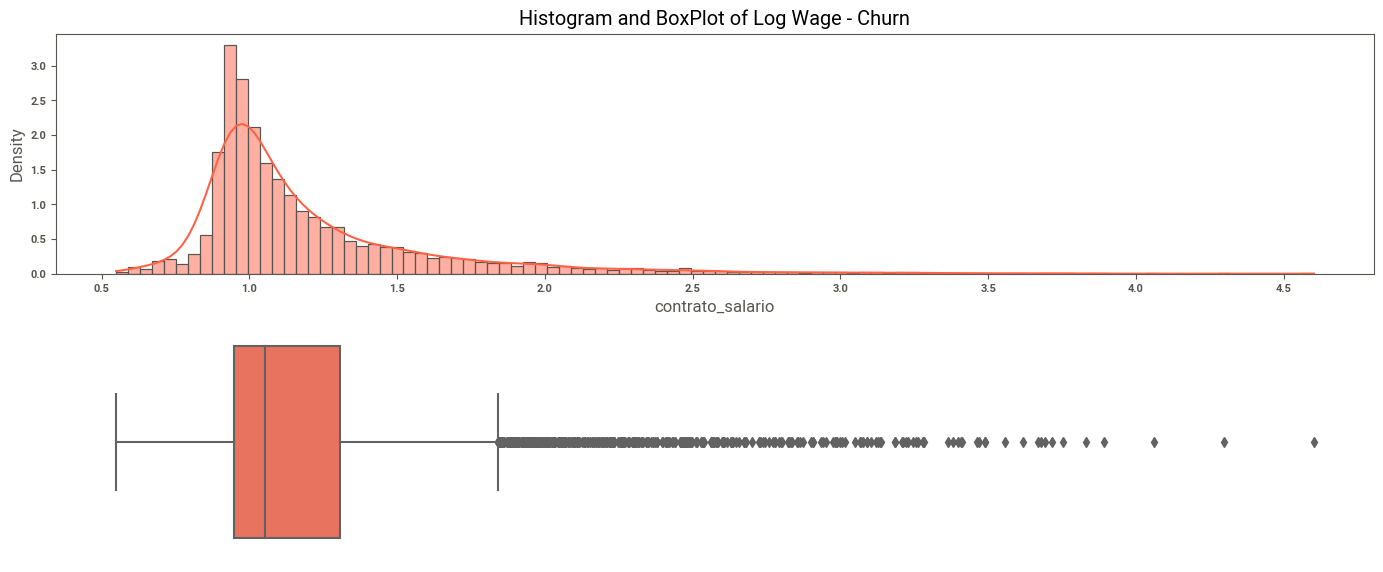

In [86]:
distribution_plot(np.log1p(df_train.contrato_salario), 'Log Wage', color='darkcyan')
distribution_plot(np.log1p(df_train.loc[df_train.turnover_apos_1_ano==0].contrato_salario), 'Log Wage - No Churn')
distribution_plot(np.log1p(df_train.loc[df_train.turnover_apos_1_ano==1].contrato_salario), 'Log Wage - Churn', color='tomato')

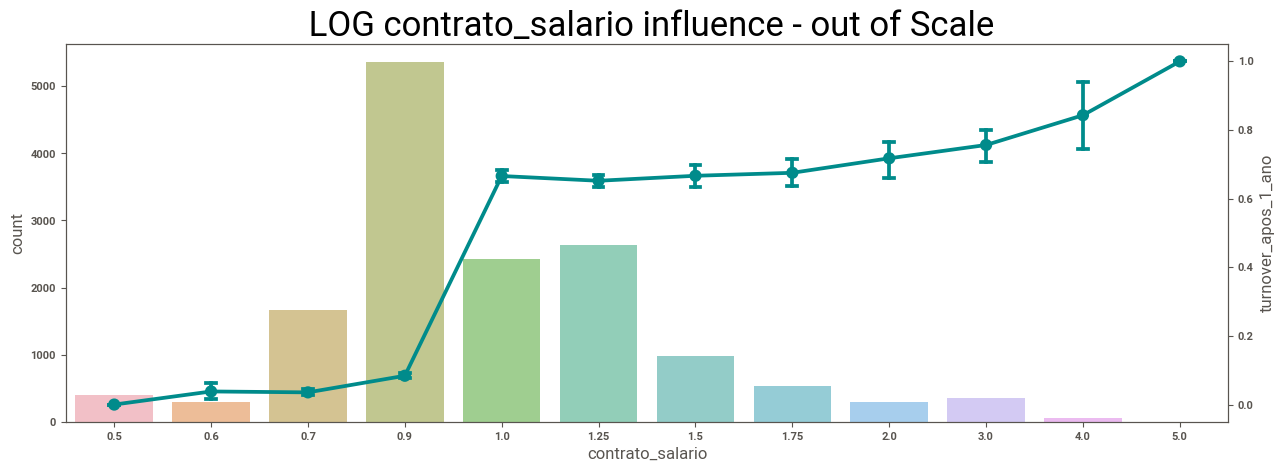

In [87]:
def log_wage_plot(data, color = 'darkcyan', hue = None):  # from: https://www.kaggle.com/code/galaxygeorge/customer-churn-modeling-eda-fe-model#EDA-+-FE:-Exploratory-Data-Analysis-and-Feature-Engineering
    
    col_name = 'contrato_salario'
    wage_data = data[[col_name, 'turnover_apos_1_ano']]
    wage_data[col_name] = np.log1p(wage_data[col_name])
    wage_data[col_name] = pd.cut(wage_data[col_name],
                               bins=[0, 0.5, 0.6, 0.7, 0.9, 1, 1.25, 1.5,1.75, 2, 3, 4, 5],
                               labels=[0.5, 0.6, 0.7, 0.9, 1, 1.25, 1.5, 1.75, 2, 3, 4,  5])
    
    ax1 = sns.set_style(style=None, rc=None)

    fig, ax1 = plt.subplots(figsize=(15,5))

    sns.countplot(x=col_name, data=wage_data, ax=ax1, alpha=0.6)     \
                 .set_title(f' LOG {col_name} influence - out of Scale', fontsize=25)
    
    ax2 = ax1.twinx()
    
    sns.pointplot(x=col_name, y='turnover_apos_1_ano',
                  dodge=0.1, capsize=.1, data=wage_data, color=color, hue=hue, row=hue, ax=ax2)

    

    
log_wage_plot(df_train)

#### OBS
- It can be observed that at the same time as the turnover rate increases with the wage, the variation also gets higher

### 1.4 Comparing Wage and other features

### 1.4.1. Deficiency x Wage
* It can be observed that wahen the person has a deficiency, the churn rate is higher in almost every group of wage


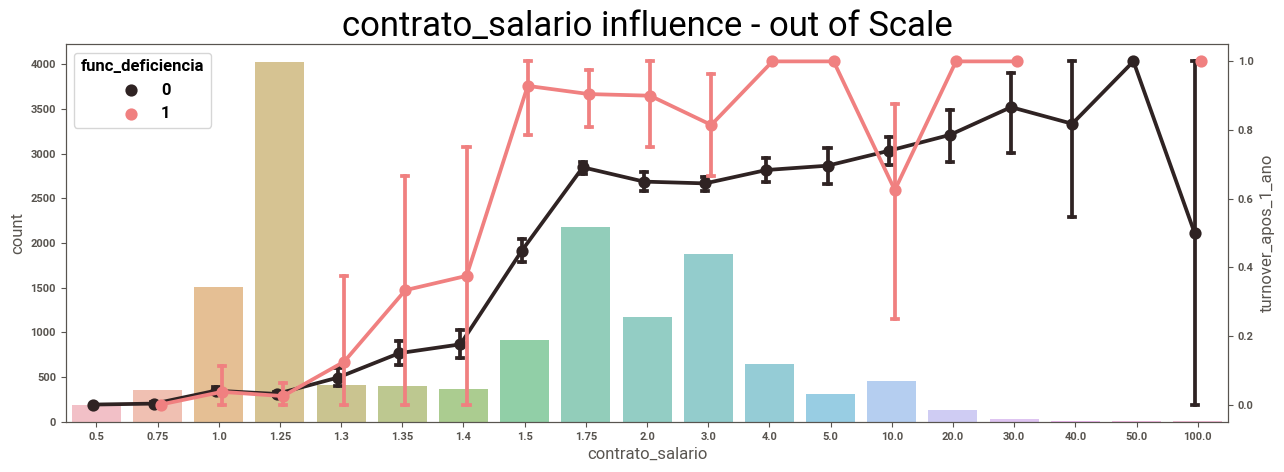

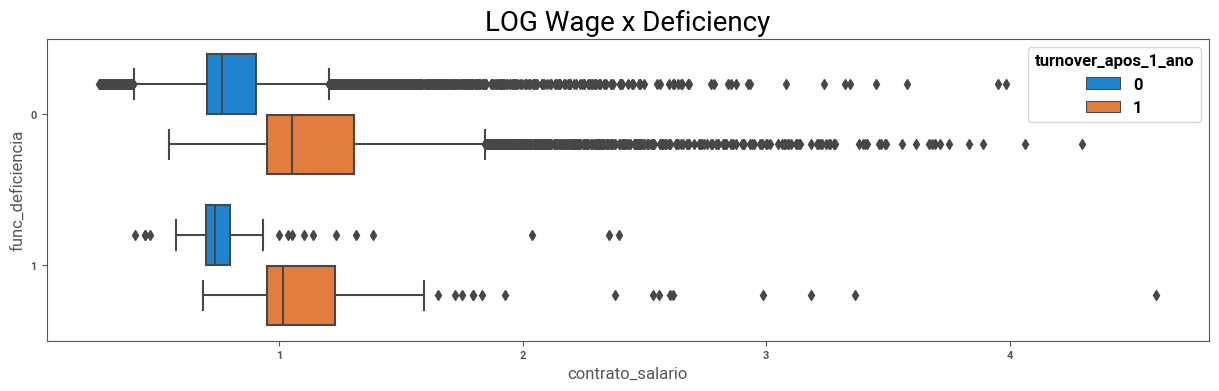

In [88]:
wage_plot(df_train, color = 'lightcoral',hue=df_train.func_deficiencia)
plt.figure(figsize=(15, 4))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , y = 'func_deficiencia', 
                 hue = 'turnover_apos_1_ano', orient="h",).set_title('LOG Wage x Deficiency', fontsize = 20)

* There seems to be a difference on churn rate when the person has a deficiency. However, since there is not much data on people with deficiency, we cannot draw a conclusion about it.

### 1.4.2. Sex x Wage

<Figure size 1500x400 with 0 Axes>

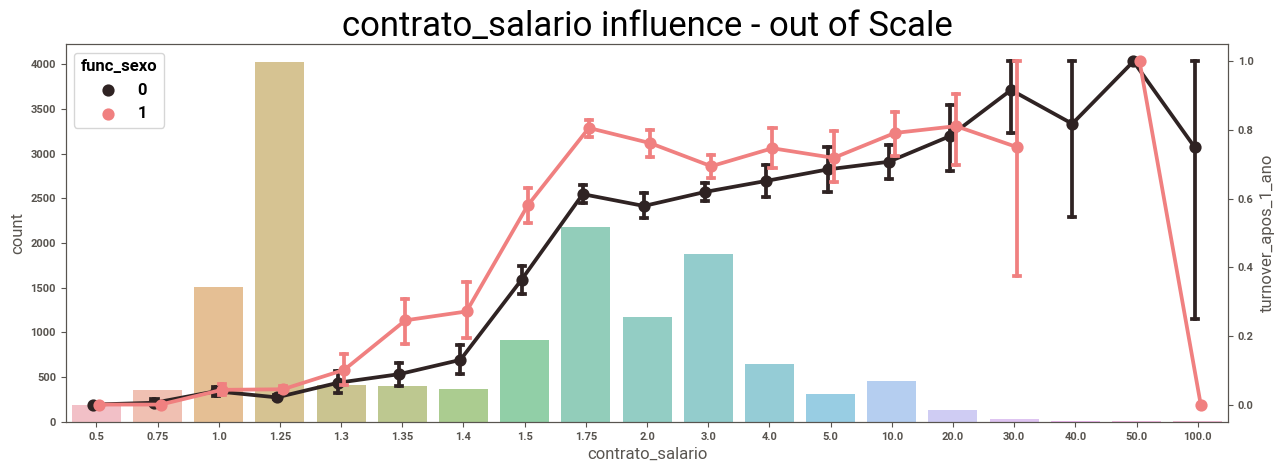

<Figure size 1500x400 with 0 Axes>

In [89]:
wage_plot(df_train, color = 'lightcoral',hue=df_train.func_sexo)



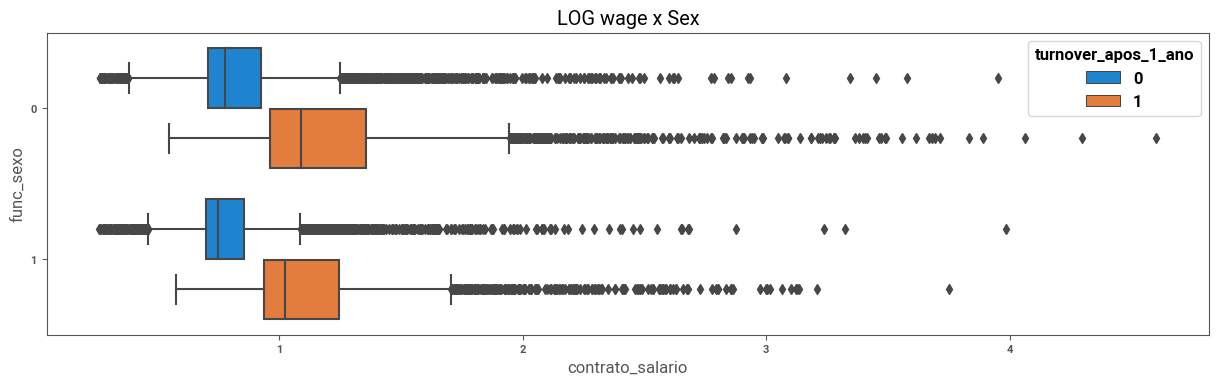

In [91]:
plt.figure(figsize=(15, 4))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , 
                 y = 'func_sexo', hue = 'turnover_apos_1_ano', orient="h",).set_title('LOG wage x Sex')

#### OBS
- Women (func_sexo = 1) have a higher chance to churn in almost all cuts

### 1.4.3. Race x Wage

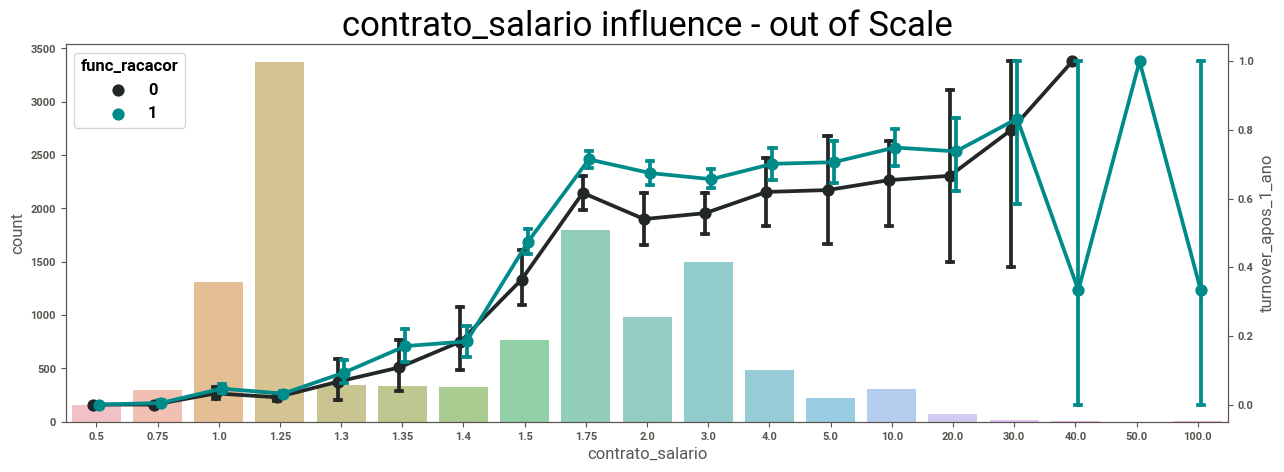

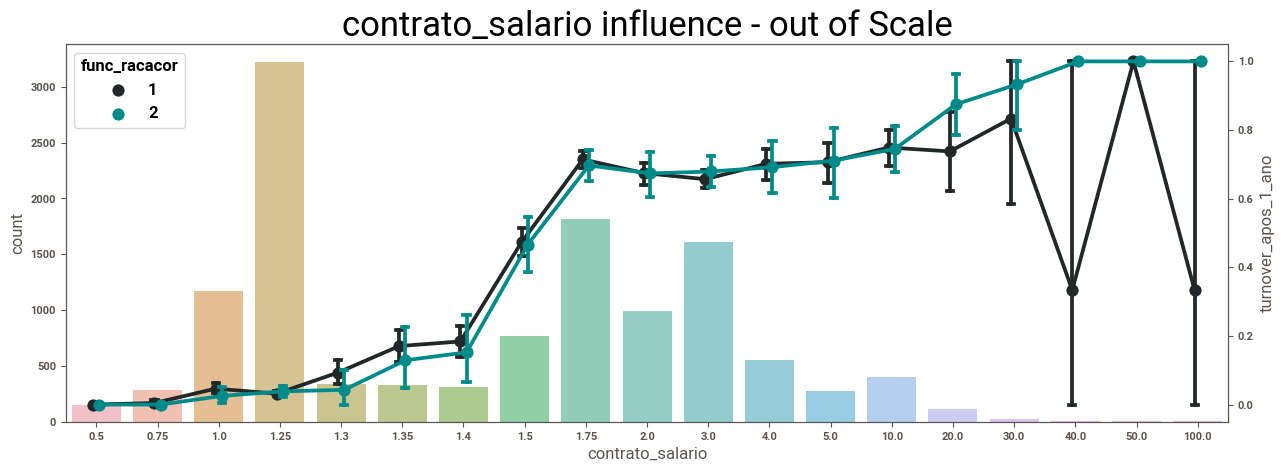

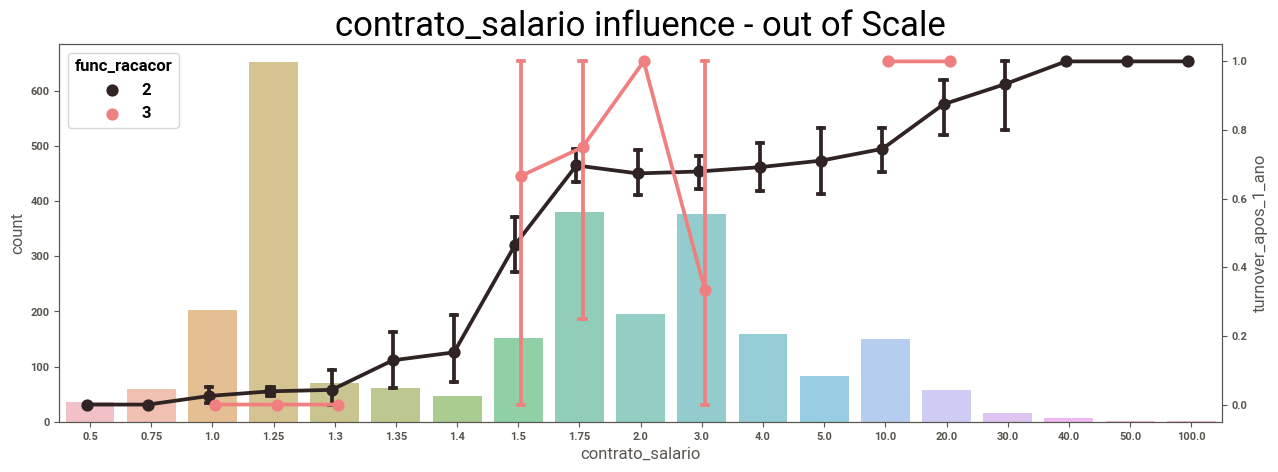

In [93]:
#wage_plot(df_train, hue=df_train.func_racacor)
wage_plot(df_train.loc[df_train.func_racacor<2], hue=df_train.loc[df_train.func_racacor<2].func_racacor)
wage_plot(df_train.loc[(df_train.func_racacor==1) | (df_train.func_racacor==2)], hue=df_train.loc[(df_train.func_racacor==1) | (df_train.func_racacor==2)].func_racacor)
wage_plot(df_train.loc[df_train.func_racacor>=2], color = 'lightcoral',hue=df_train.loc[df_train.func_racacor>=2].func_racacor)


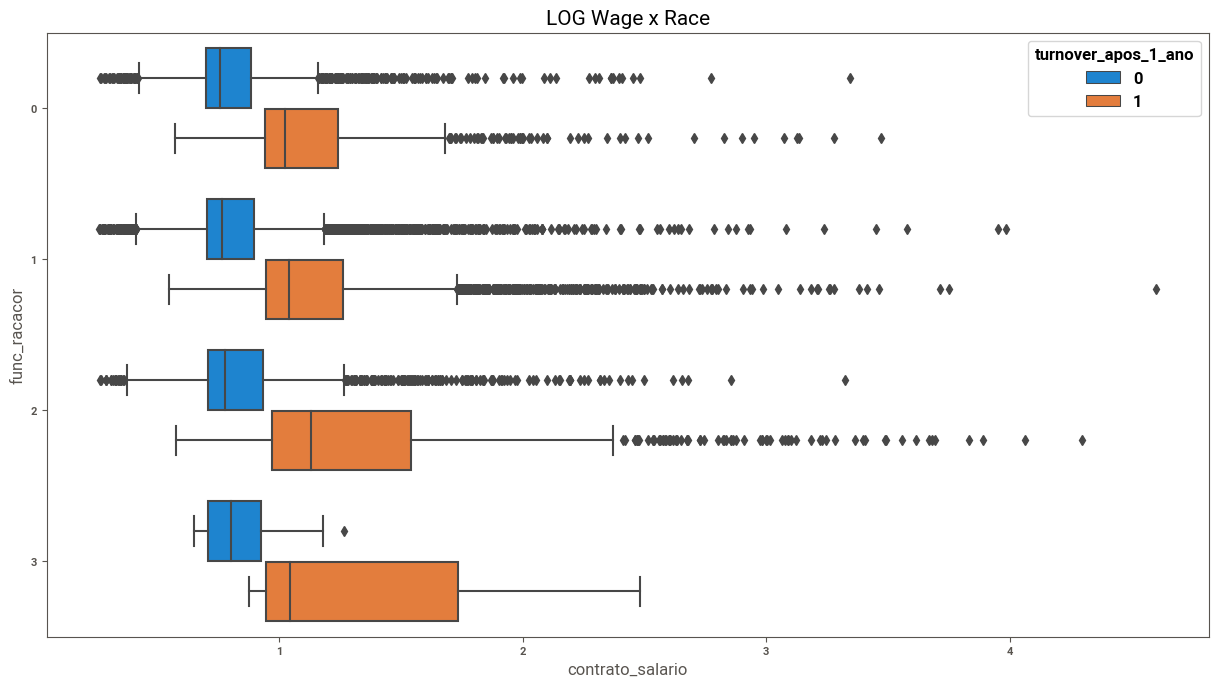

In [94]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , y = 'func_racacor', hue = 'turnover_apos_1_ano', orient="h",)\
                 .set_title(f'LOG Wage x Race', fontsize=15)

#### OBS
- Races 1,2 and 3 have a similar behaviour when contrato_salario is below 1.25K
- There is a similarity when there is no churn in the groups 0, 1 (and 2)
- On the other hand, when there is a churn, the similar groups are 0 and 1 (and the median of 3)
- An ANOVA test will be performed later to compare these groups

### 1.4.4. Education x Wage

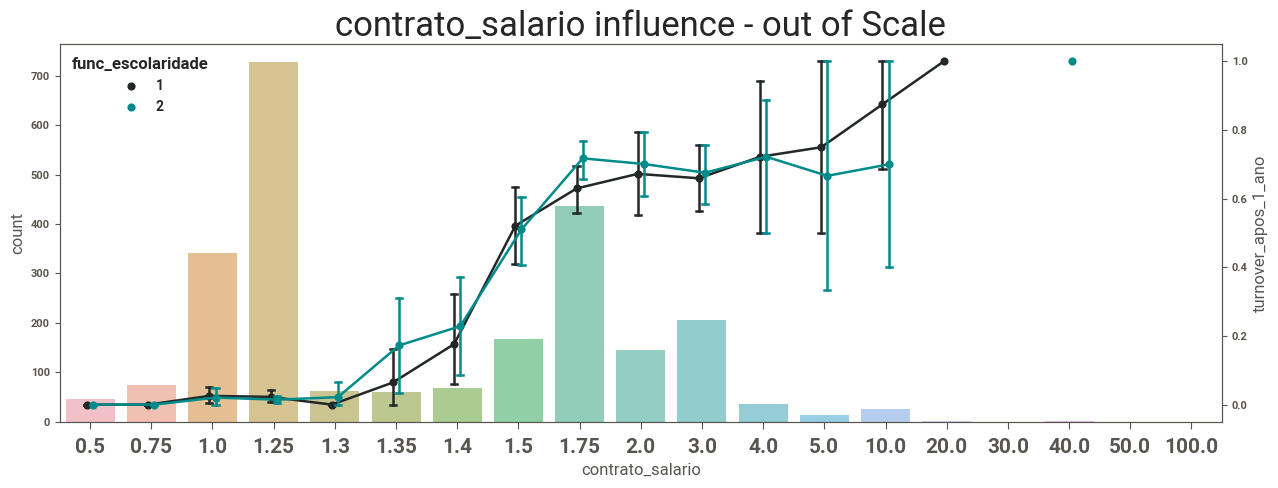

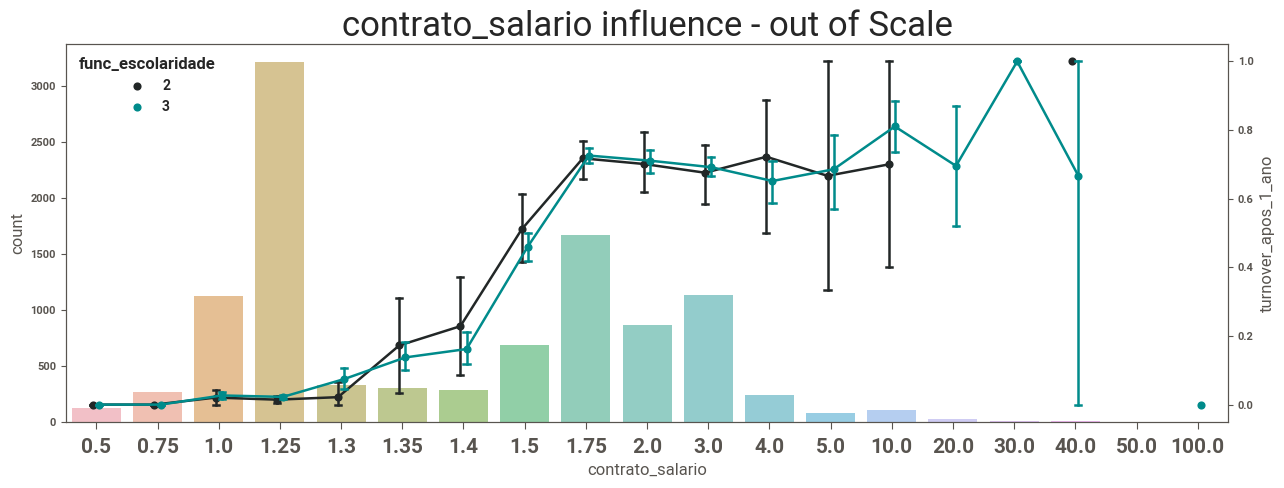

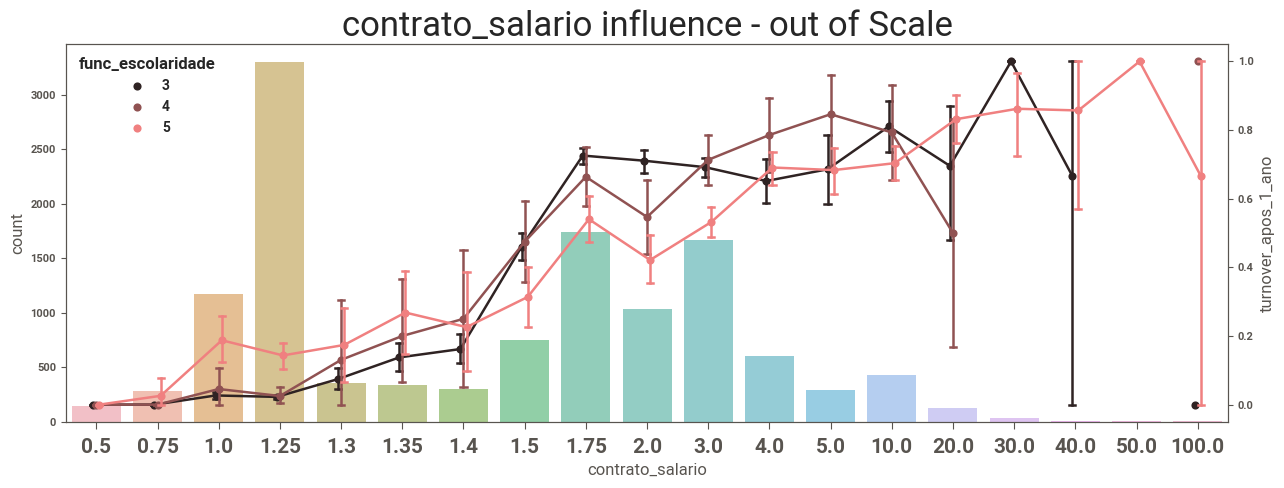

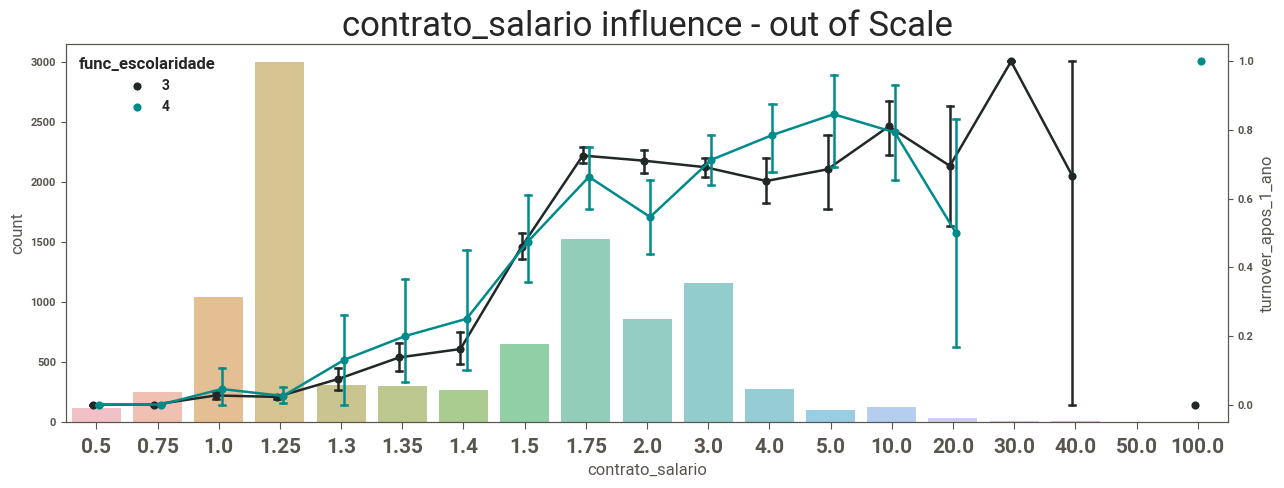

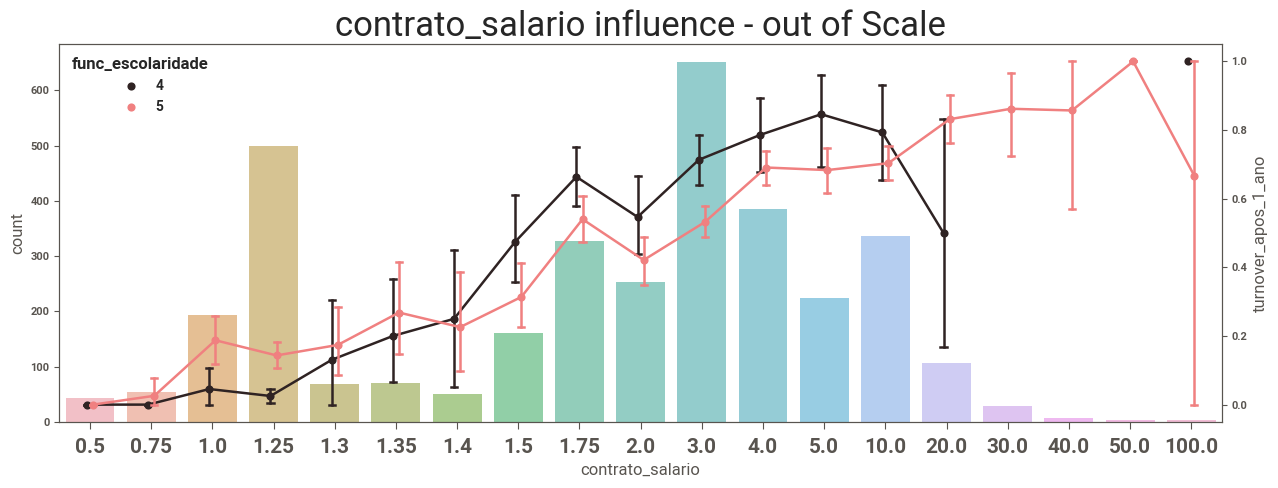

In [230]:
wage_plot(df_train.loc[df_train.func_escolaridade<3], hue=df_train.loc[df_train.func_escolaridade<3].func_escolaridade)
wage_plot(df_train.loc[(df_train.func_escolaridade==3) | (df_train.func_escolaridade==2)], hue=df_train.loc[(df_train.func_escolaridade==3) | (df_train.func_escolaridade==2)].func_escolaridade)
wage_plot(df_train.loc[df_train.func_escolaridade>=3], color = 'lightcoral',hue=df_train.loc[df_train.func_escolaridade>=3].func_escolaridade)
wage_plot(df_train.loc[(df_train.func_escolaridade==3) | (df_train.func_escolaridade==4)], hue=df_train.loc[(df_train.func_escolaridade==3) | (df_train.func_escolaridade==4)].func_escolaridade)
wage_plot(df_train.loc[df_train.func_escolaridade>=4], color = 'lightcoral',hue=df_train.loc[df_train.func_escolaridade>=4].func_escolaridade)


#### OBS
* When wage is lower than 1.25K, all the education levels has a similar behaviour with a exception for the level 5

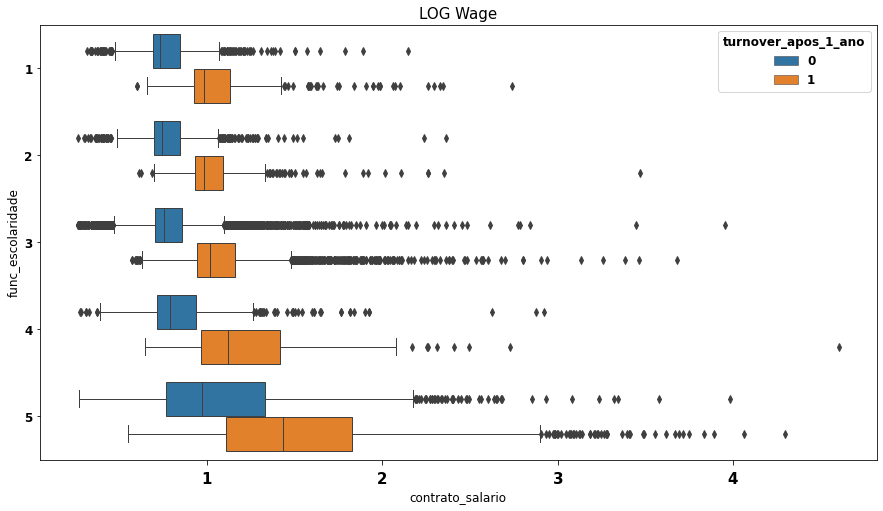

In [277]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , y = 'func_escolaridade', hue = 'turnover_apos_1_ano', orient="h",)\
                 .set_title(f'LOG Wage', fontsize=15)

#### OBS
* There is a interesting behaviour when the education level is 5: The wage intersect (when there is churn or not) is higher. Despite that fact, it can be observed from ANOVA that there is a distinction in the comparison between both


In [235]:
# Anova to compare churn and no churn for level of education 5
df_anova = df_train.loc[df_train.func_escolaridade == 5]
df_anova = pd.DataFrame(stats.f_oneway(df_anova.loc[df_anova.turnover_apos_1_ano == 0],
              df_anova.loc[df_anova.turnover_apos_1_ano == 1])[1],
             index = df_train.columns,
                       columns = ['p_value'])

def func_anova(x):
    if x >= 0.05:
        return '='
    else:
        return 'distinct'


df_anova['ANOVA'] = df_anova['p_value'].map(func_anova)
df_anova

,p_value,ANOVA
func_sexo,8.588195e-01,=
func_idade,2.607374e-19,distinct
func_racacor,9.418700e-06,distinct
func_escolaridade,NaN,distinct
func_uf,1.932252e-02,distinct
func_deficiencia,1.526273e-01,=
empresa_porte,3.434661e-14,distinct
empresa_setor,4.222959e-05,distinct
contrato_horastrabalho,1.985680e-08,distinct
contrato_salario,9.970369e-40,distinct


### 1.4.5. Company Size x Wage

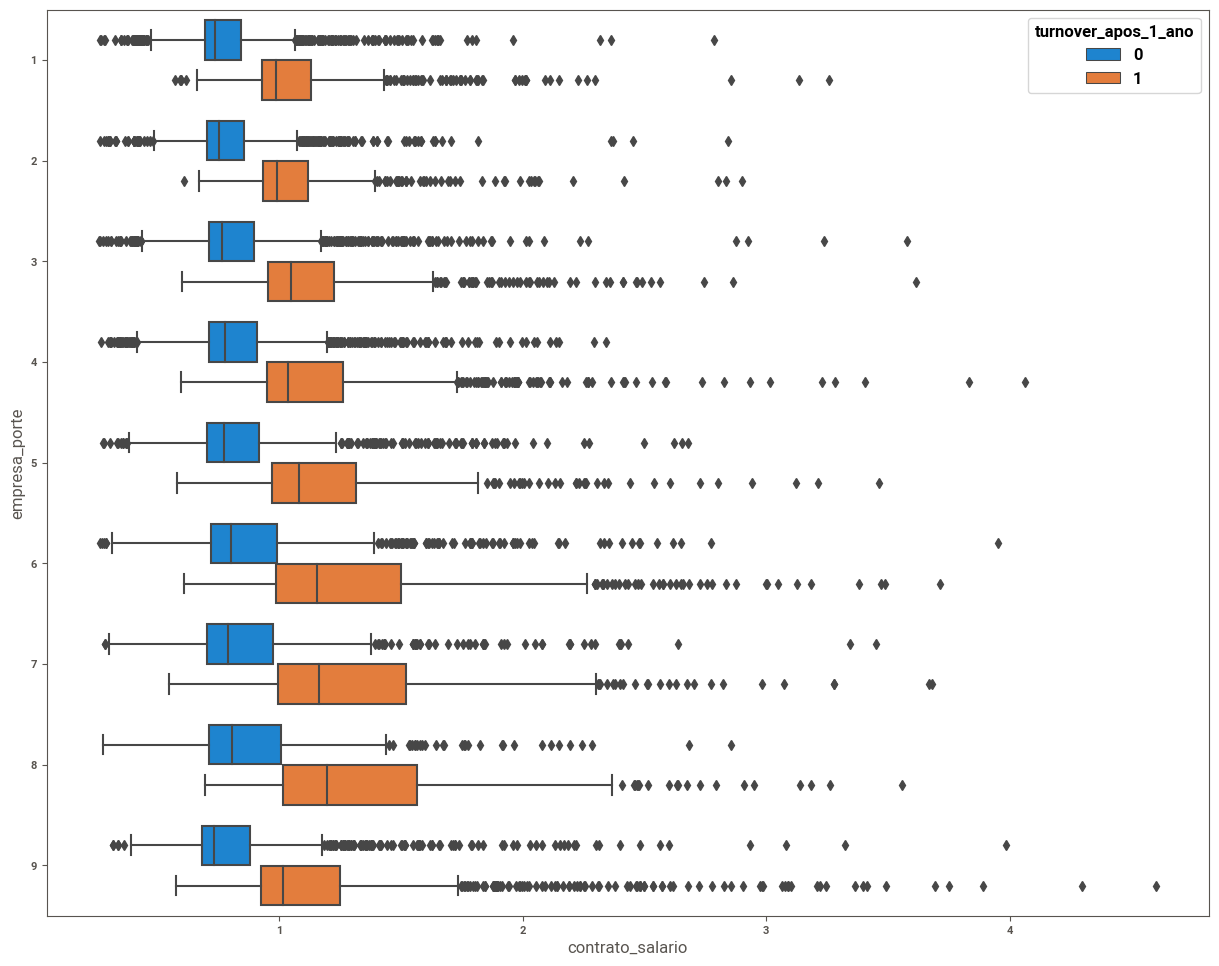

In [95]:
plt.figure(figsize=(15, 12))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , y = 'empresa_porte', hue = 'turnover_apos_1_ano', orient="h",)

### 1.4.6. Sector x Wage

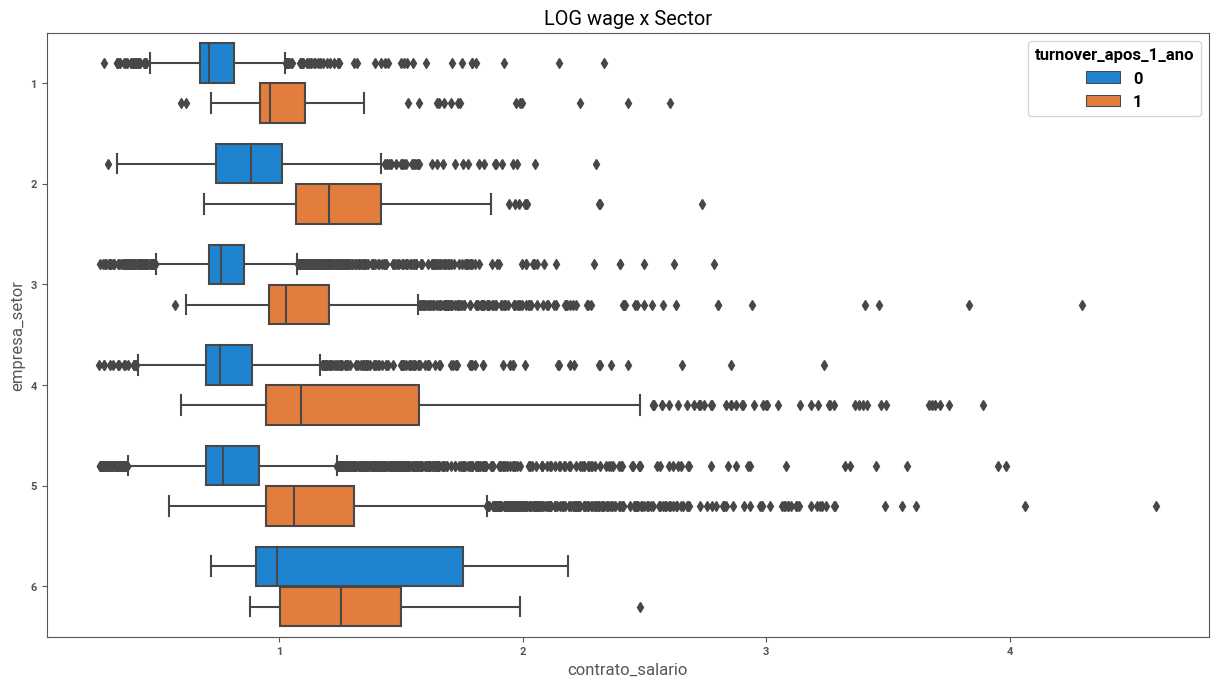

In [96]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , 
                 y = 'empresa_setor', hue = 'turnover_apos_1_ano', orient="h",).set_title('LOG wage x Sector')

#### OBS
* When sector is 6 (Public Administration), there is a huge difference from the others which could be a result of few data 

### 1.4.7. State x Wage

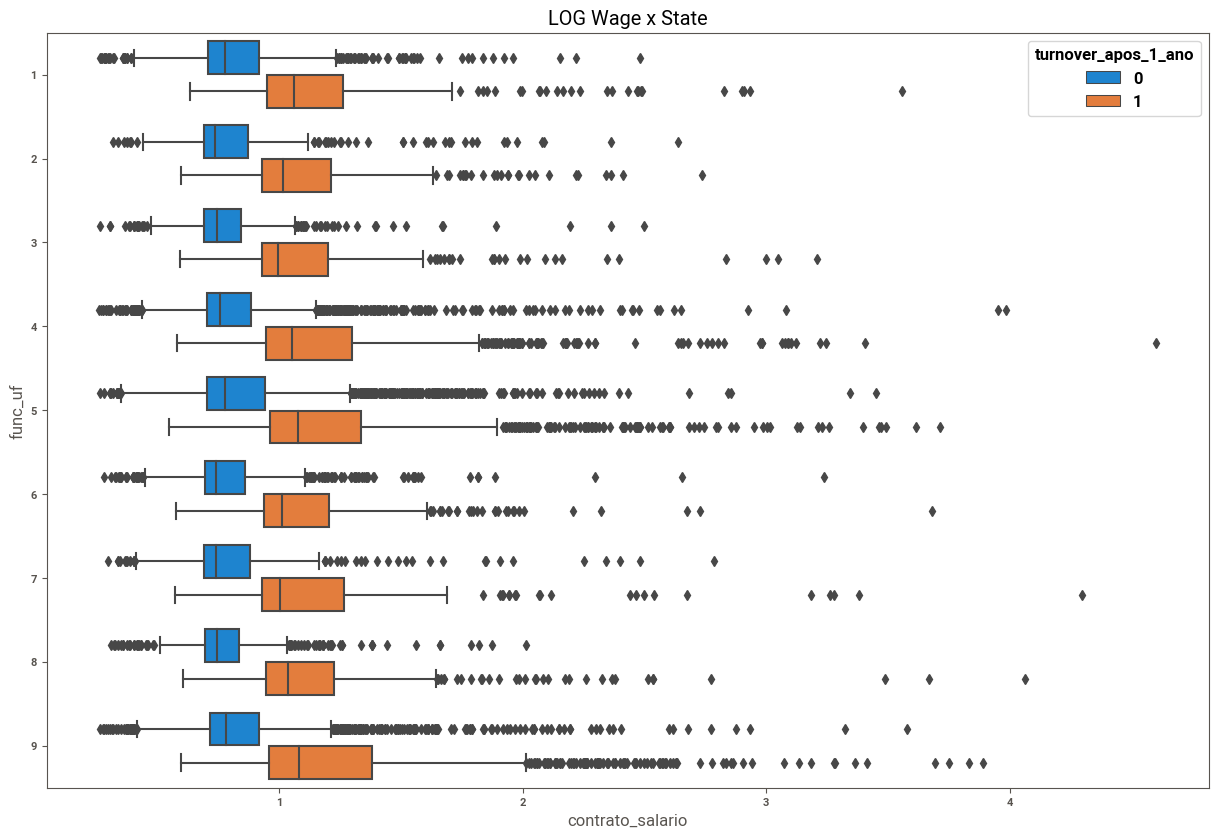

In [97]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df_train, x = np.log1p(df_train.contrato_salario) , 
                 y = 'func_uf', hue = 'turnover_apos_1_ano', 
                 orient="h",).set_title('LOG Wage x State')

### 1.4.8. Age x Wage

<Figure size 1500x500 with 0 Axes>

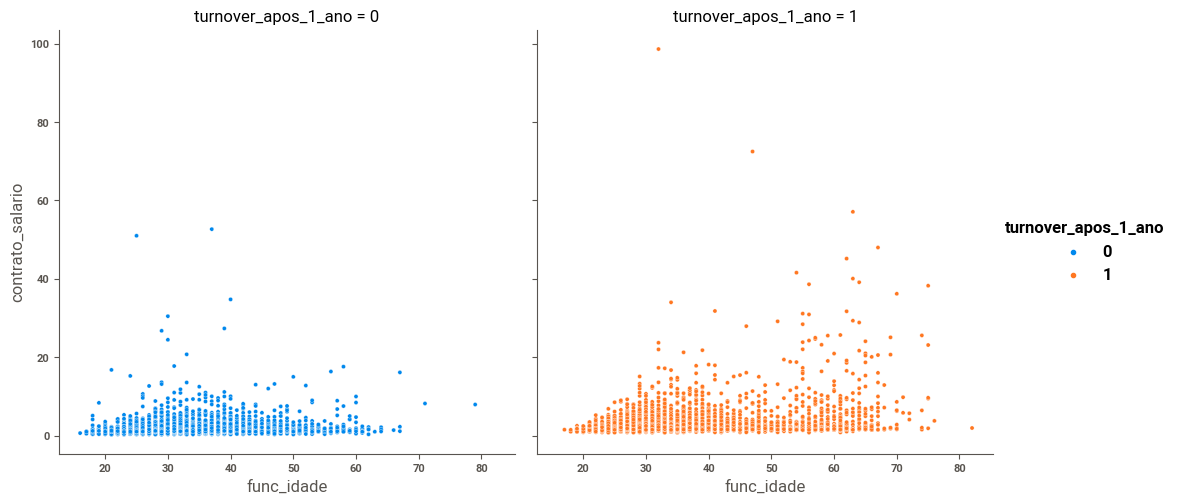

In [99]:
plt.figure(figsize=(15,5))
sns.relplot(data=df_train, x="func_idade", y="contrato_salario", hue =  'turnover_apos_1_ano',
               col =  'turnover_apos_1_ano',)

#### OBS:
* When wage is higher, it can be noted that when there is a churn, the age is also higher. 
* On the other hand, for no churn data, the age is lower, especially when looking at outliers.

### 1.4.9. Work hours x Wage

<Figure size 1500x500 with 0 Axes>

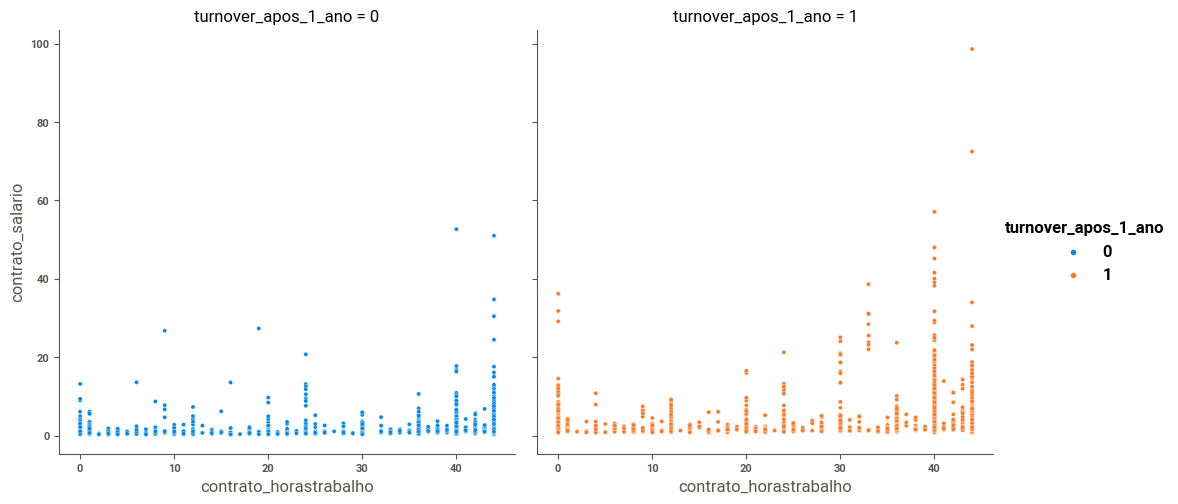

In [100]:
plt.figure(figsize=(15,5))
sns.relplot(data=df_train, x="contrato_horastrabalho", y="contrato_salario", hue =  'turnover_apos_1_ano',
               col =  'turnover_apos_1_ano', )
            


## <font color=blue> 2. EDA - func_idade

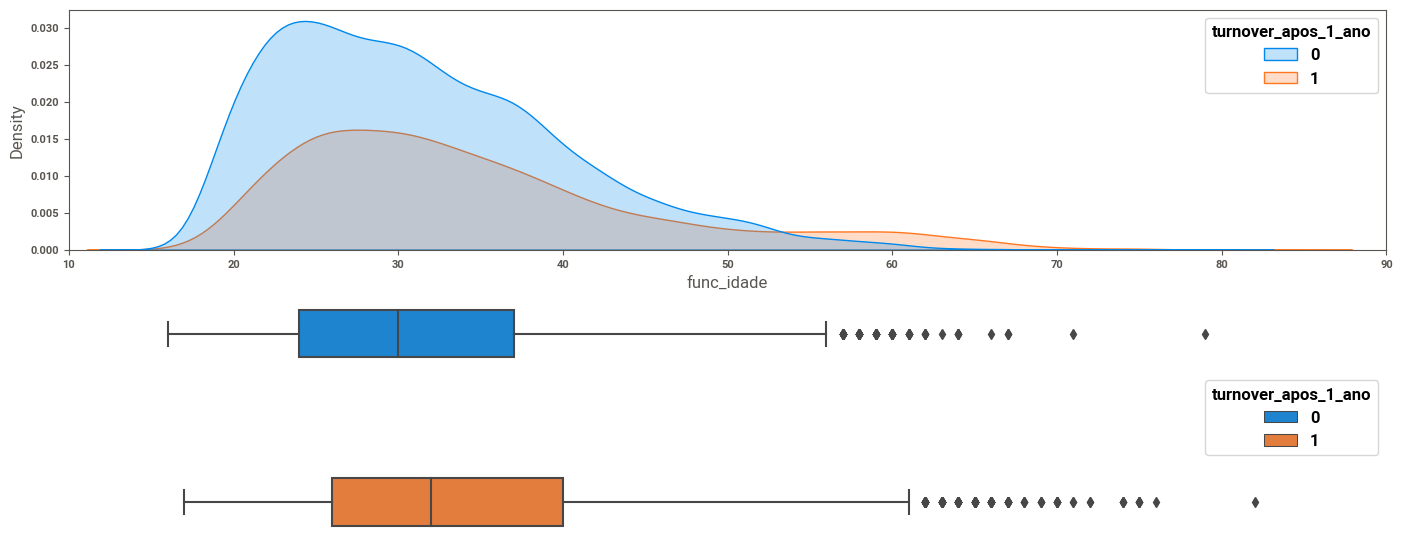

In [102]:
fig = plt.figure(figsize=(17, 7))
grid = GridSpec(nrows=2, ncols=1, figure=fig)

ax0 = fig.add_subplot(grid[0, :])
sns.kdeplot(data=df_train, x="func_idade", hue="turnover_apos_1_ano", multiple="layer", 
           fill=True, ax=ax0
           )
ax0.set_xlim(left=10, right=90)



ax1 = fig.add_subplot(grid[1, :])
plt.axis('off')
sns.boxplot(data=df_train, x = df_train.func_idade, y = 'turnover_apos_1_ano', 
                 hue = 'turnover_apos_1_ano', 
            orient="h",ax=ax1)
ax1.set_xlim(left=10, right=90)
plt.show()

* It can be highlighted that when age is below 55, there are more no churn data. However, when the age is above that mark, the churn exceeds the no churn.

Skewness for Age =======>>> 1.075
Skewness for Age - No Churn =======>>> 0.827
Skewness for Age - Churn =======>>> 1.107


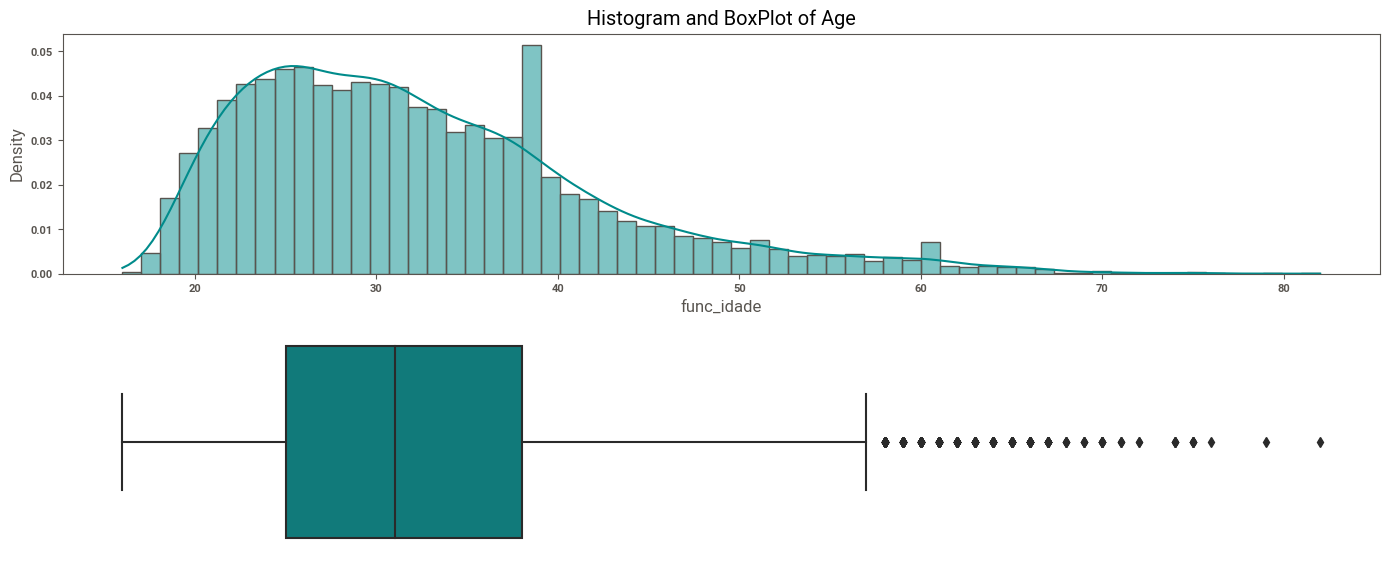

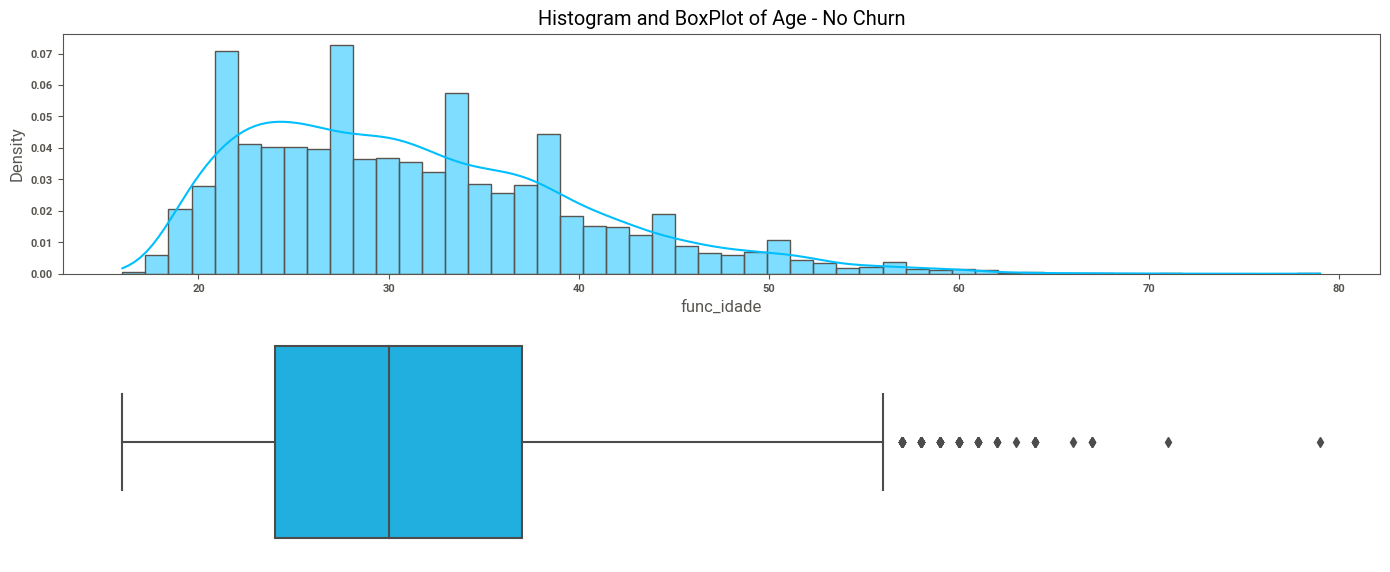

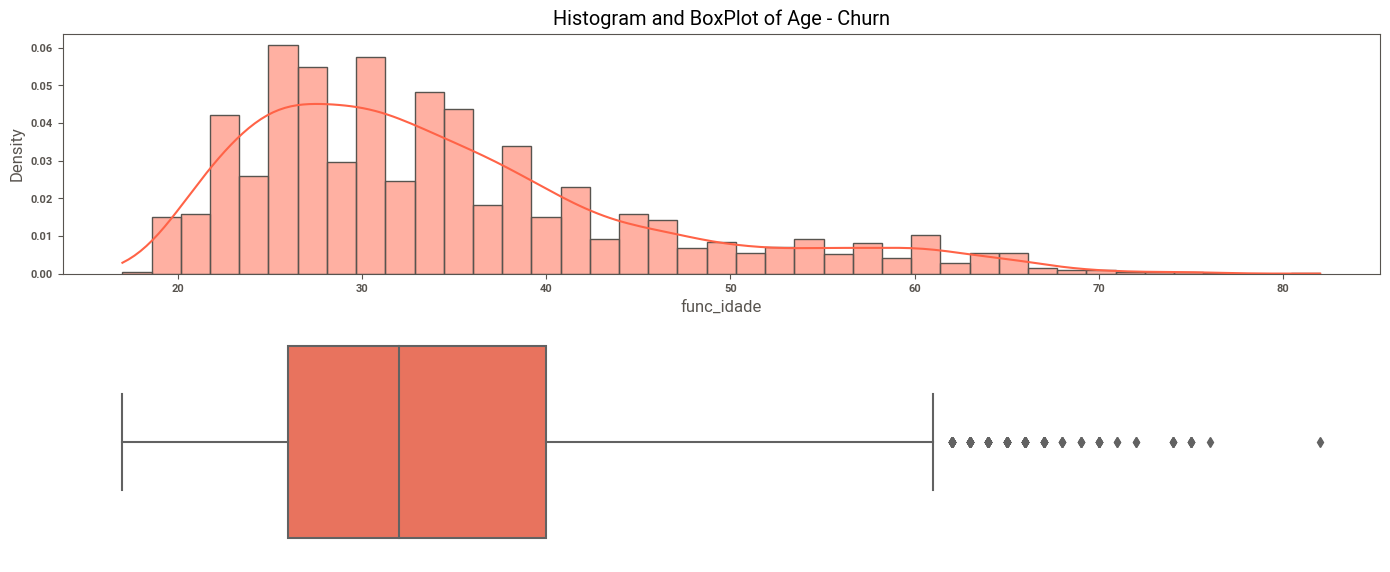

In [104]:
distribution_plot(df_train['func_idade'], 'Age', color='darkcyan')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==0]['func_idade'], 'Age - No Churn')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==1]['func_idade'], 'Age - Churn', color='tomato')



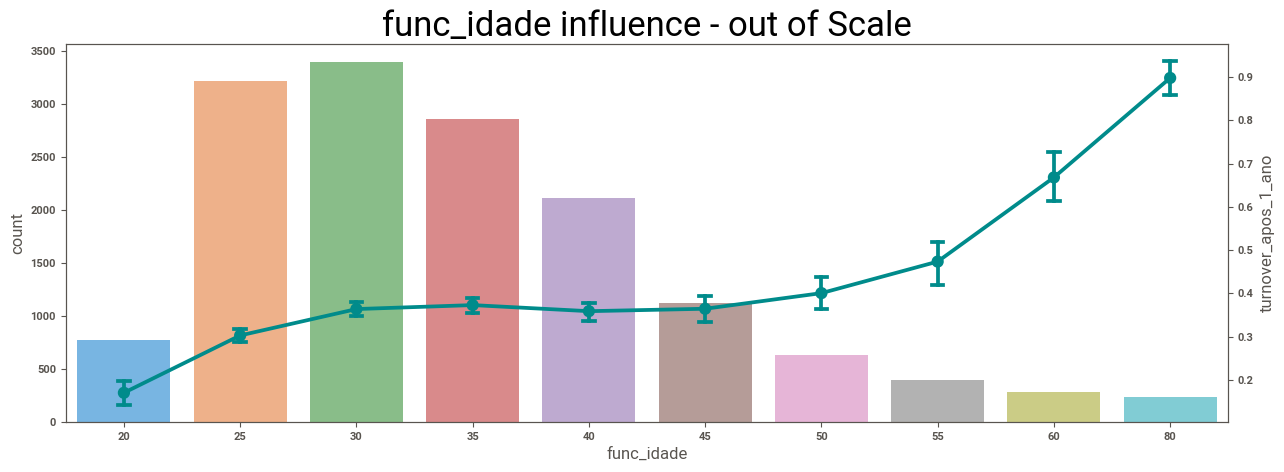

In [105]:
def age_plot(data, color = 'darkcyan', hue = None): 
    
    col_name = 'func_idade'
    age_data = data[[col_name, 'turnover_apos_1_ano']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[0, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 80],
                               labels=[ 20, 25, 30, 35, 40 , 45, 50, 55, 60, 80])

    ax1 = sns.set_style(style=None, rc=None)

    fig, ax1 = plt.subplots(figsize=(15,5))

    sns.countplot(x=col_name, data=age_data, ax = ax1, alpha=0.6) \
                 .set_title(f'{col_name} influence - out of Scale', fontsize=25)
    

    ax2 = ax1.twinx()
    sns.pointplot(x=col_name, y='turnover_apos_1_ano',
                  dodge=0.1, capsize=.1, data=age_data, color=color, hue=hue, row=hue, ax = ax2) 
    
    
age_plot(df_train)

### Wage x Age

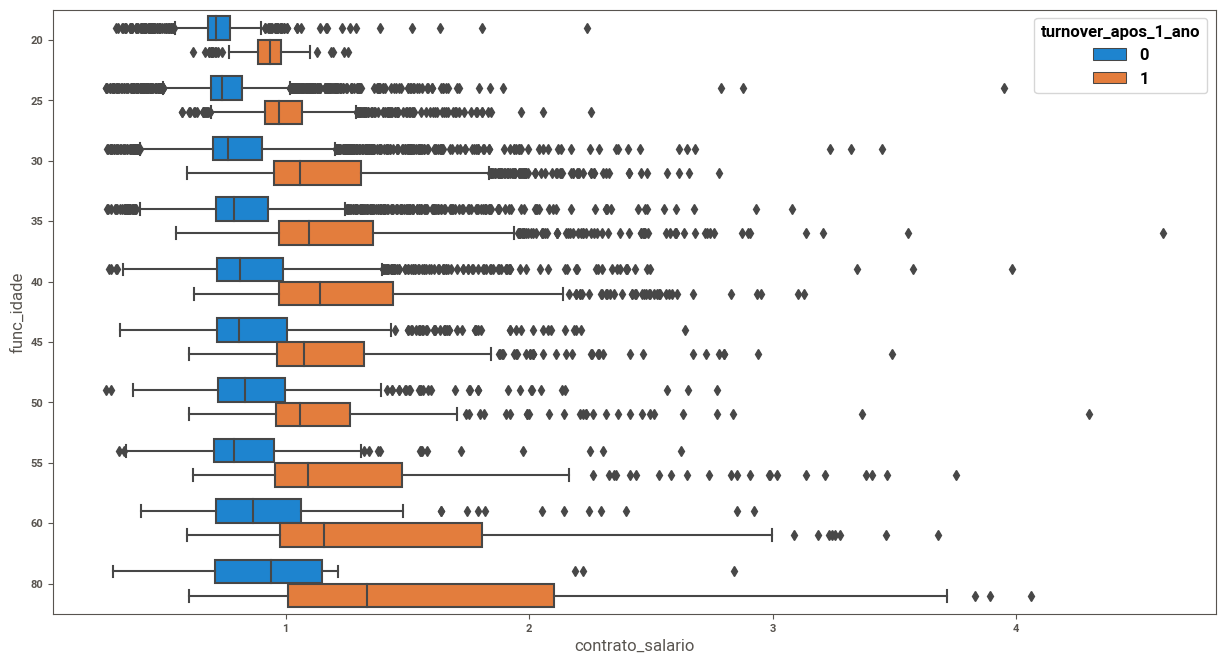

In [106]:
age_data = df_train[['func_idade', 'turnover_apos_1_ano', 'contrato_salario']]
age_data['func_idade'] = pd.cut(age_data['func_idade'],
                               bins=[0, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 80],
                               labels=[ 20, 25, 30, 35, 40 , 45, 50, 55, 60, 80])

plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=age_data, x = np.log1p(age_data.contrato_salario) , y = 'func_idade', hue = 'turnover_apos_1_ano', orient="h",)

### Escolar x Age

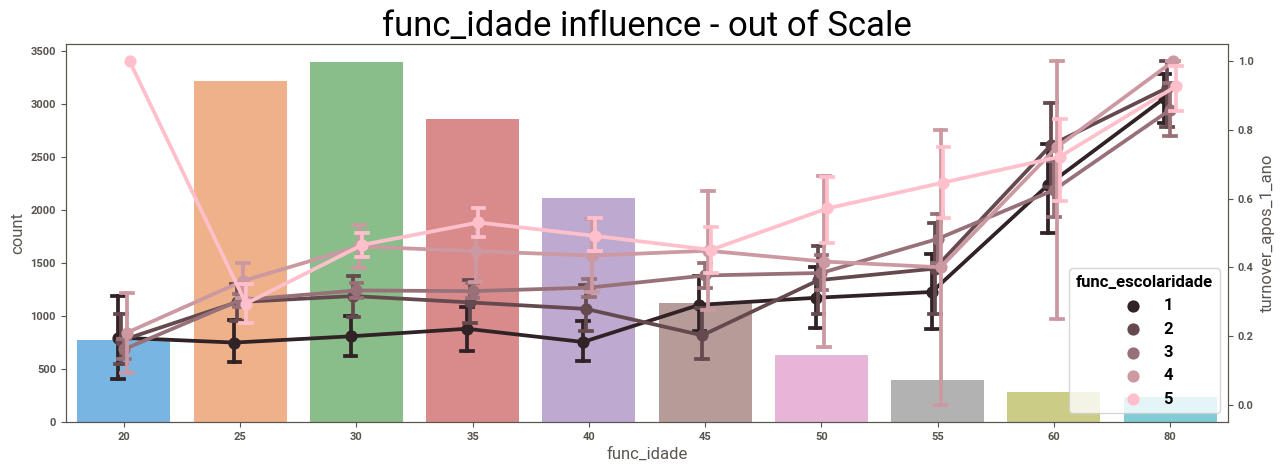

In [107]:
age_plot(df_train, color='pink', hue = df_train.func_escolaridade)

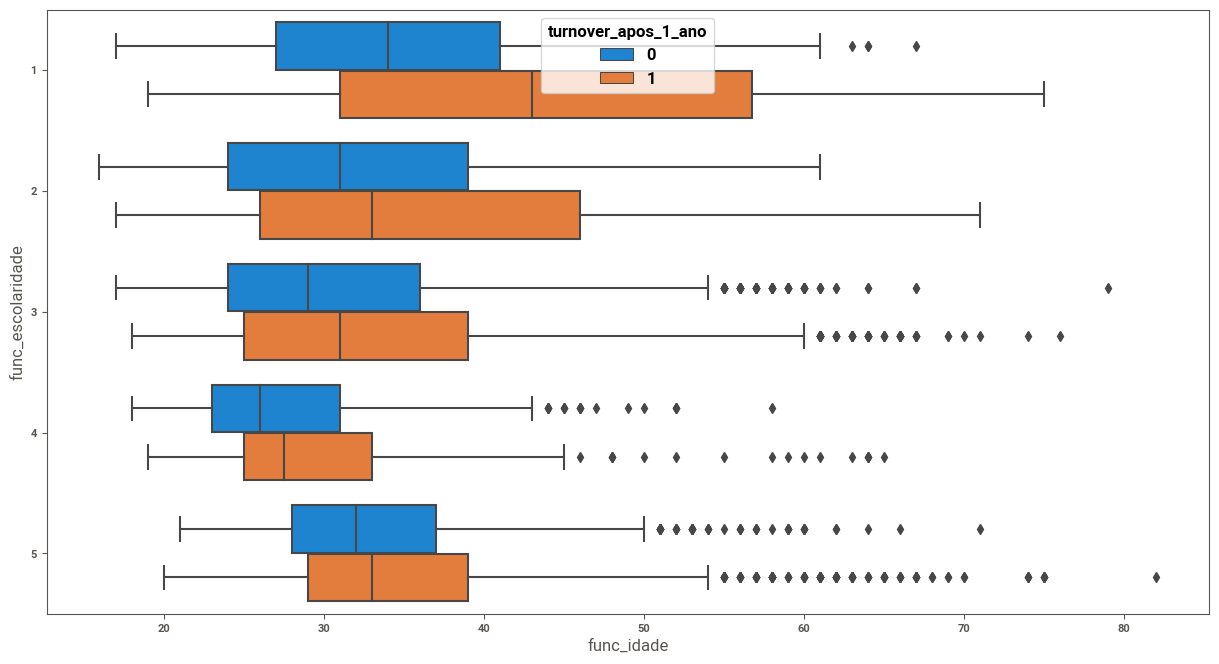

In [108]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = 'func_idade' , y = 'func_escolaridade', hue = 'turnover_apos_1_ano', orient="h",)

### Race x Age

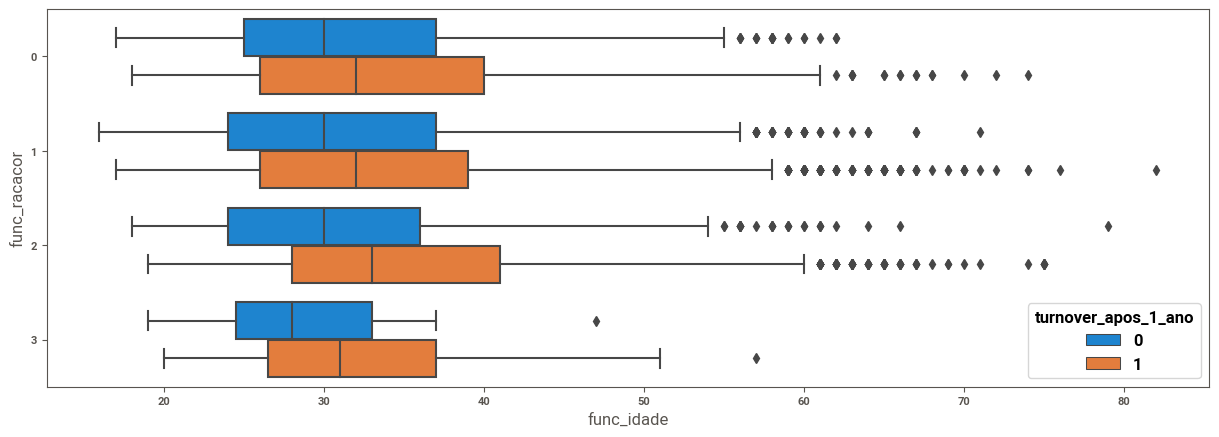

In [110]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=df_train, x = 'func_idade' , y = 'func_racacor', hue = 'turnover_apos_1_ano', orient="h",)

### Company Size x Age

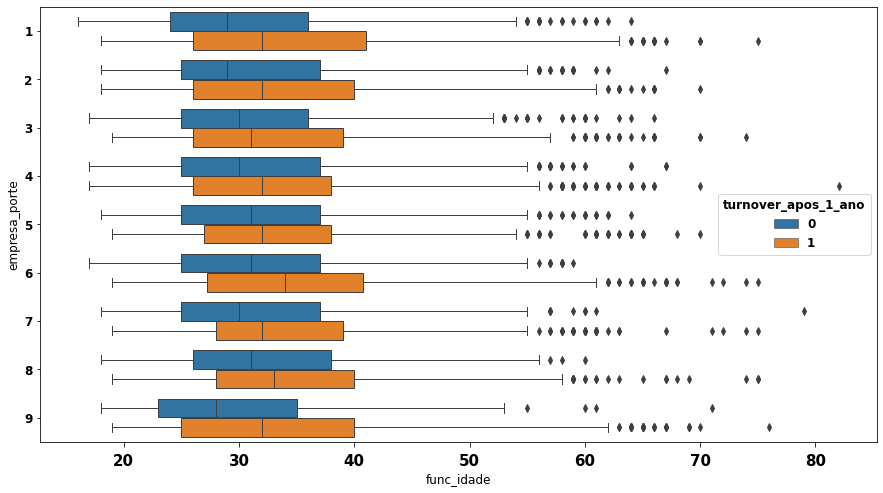

In [292]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = 'func_idade' , y = 'empresa_porte', hue = 'turnover_apos_1_ano', orient="h",)

### Company Sector x Age

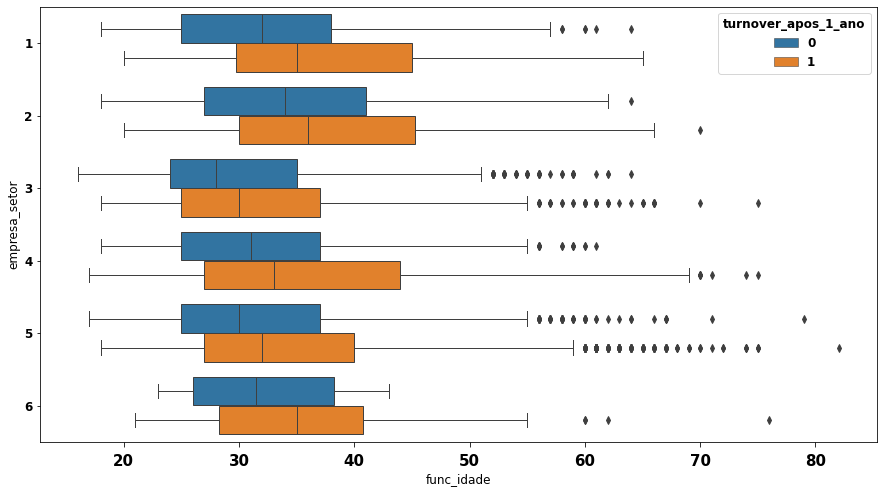

In [294]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = 'func_idade' , y = 'empresa_setor', hue = 'turnover_apos_1_ano', orient="h",)

### State x Age

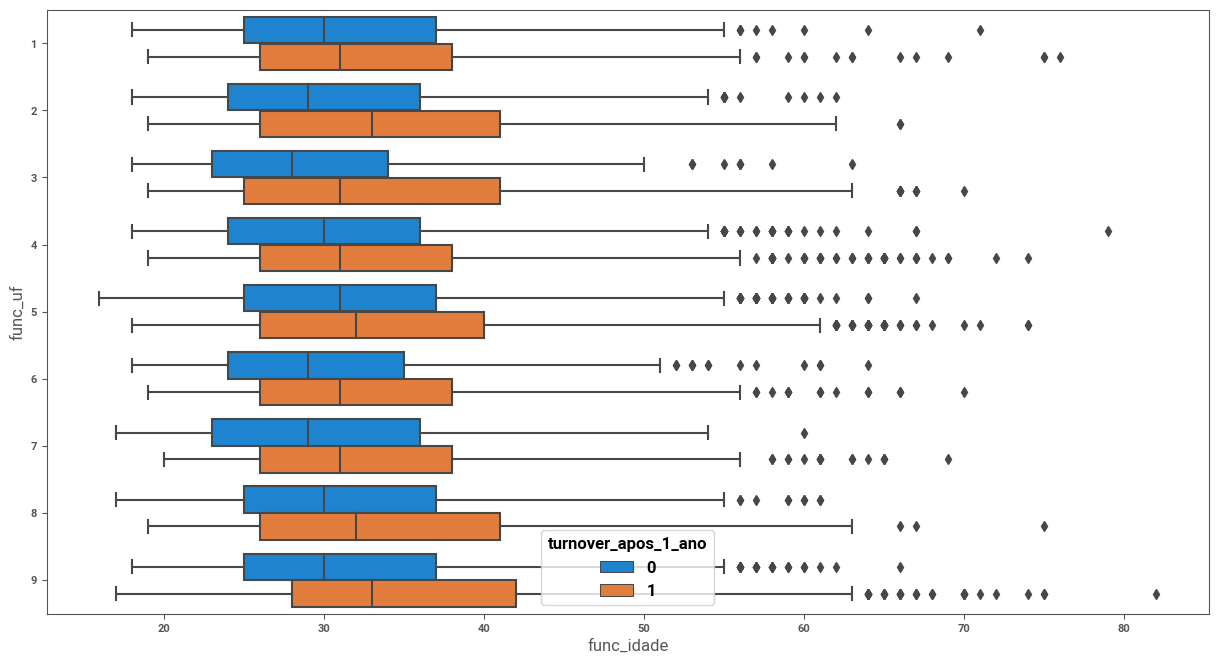

In [111]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_train, x = 'func_idade' , y = 'func_uf', hue = 'turnover_apos_1_ano', orient="h",)

## <font color=blue> 3. EDA - Work Hours

<AxesSubplot:xlabel='contrato_horastrabalho', ylabel='Density'>

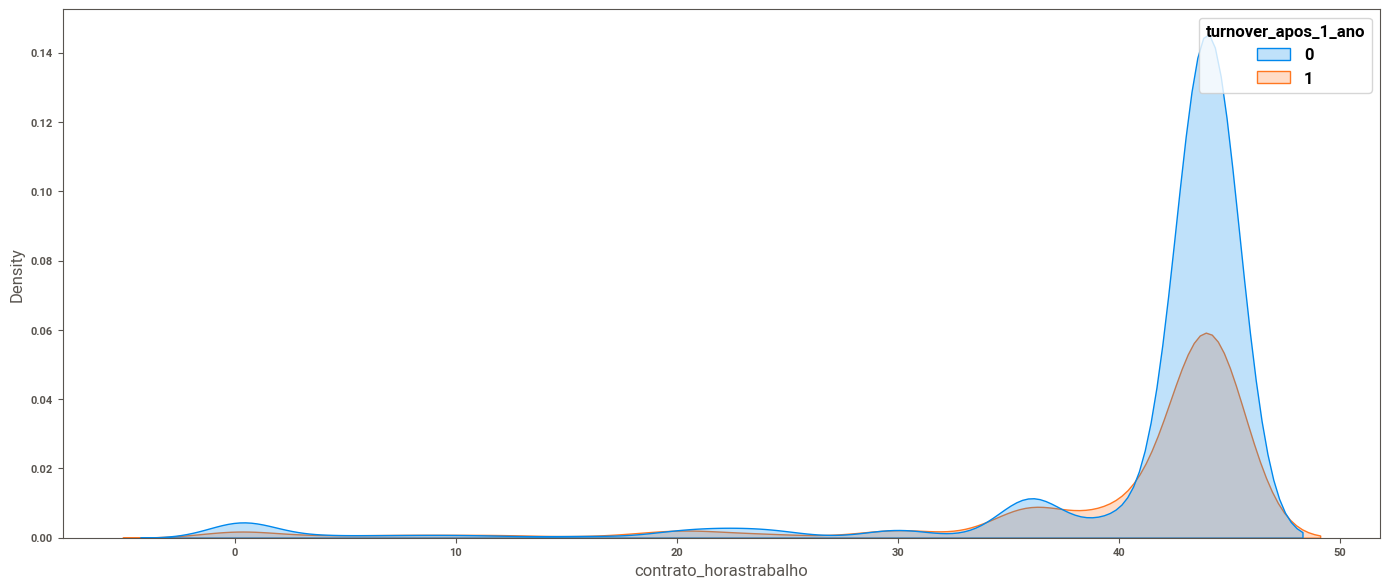

In [112]:
plt.figure(figsize=(17, 7))
sns.kdeplot(data=df_train, x="contrato_horastrabalho", hue="turnover_apos_1_ano", multiple="layer", 
           fill=True
           )

* From the distribution plot, it can be noted that the churn rate varies along the work hours

Skewness for Work hours =======>>> -3.143
Skewness for Work hours - No Churn =======>>> -3.398
Skewness for Work hours - Churn =======>>> -2.770


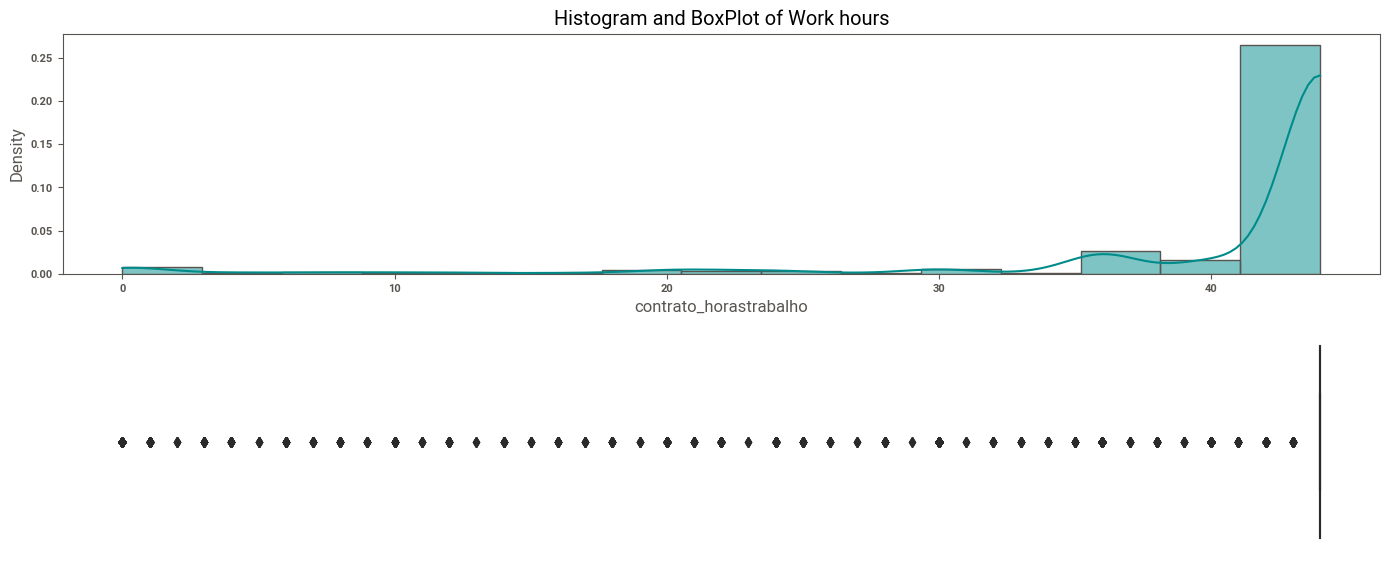

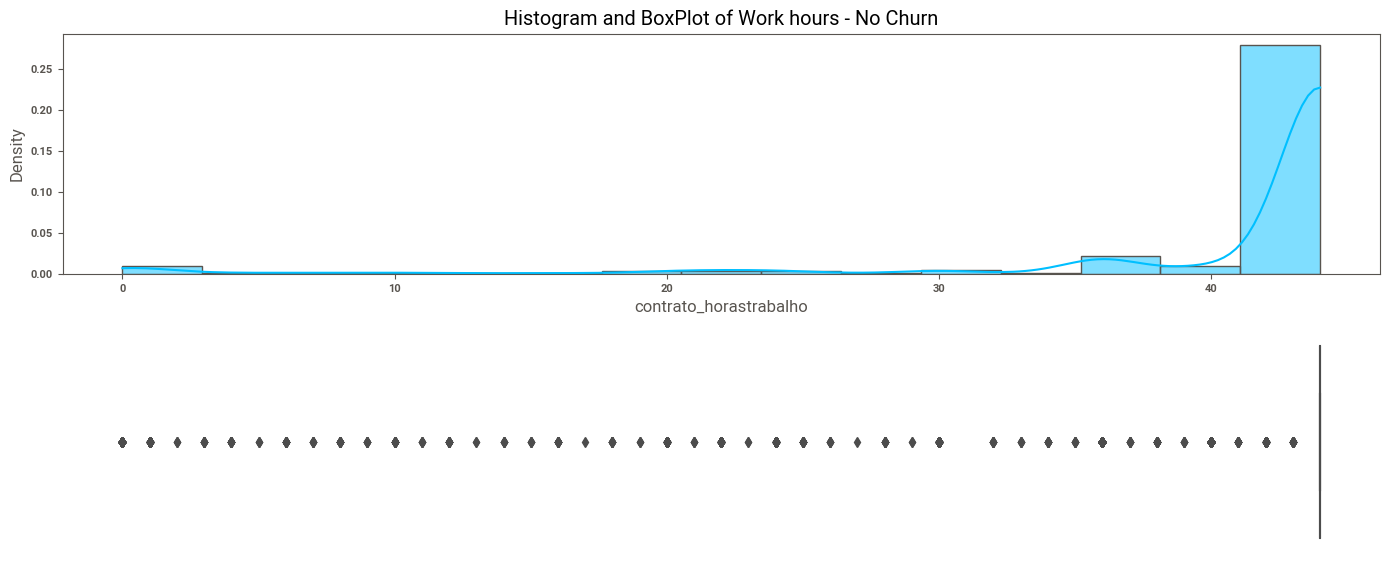

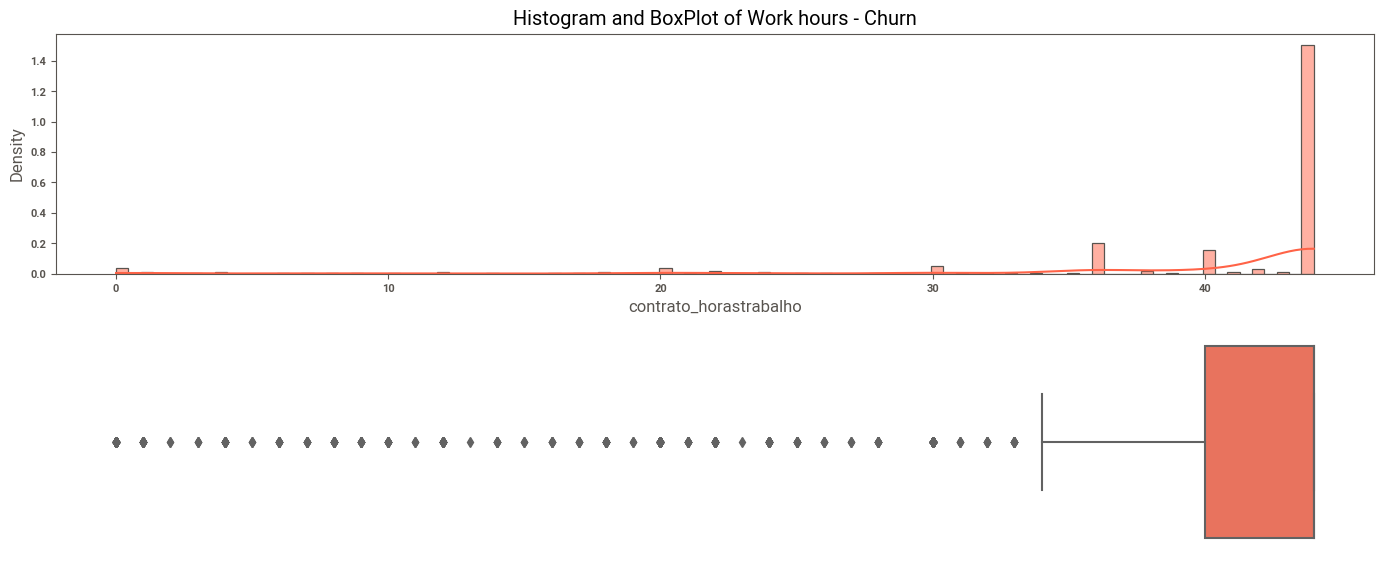

In [113]:
distribution_plot(df_train['contrato_horastrabalho'], 'Work hours', color='darkcyan')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==0]['contrato_horastrabalho'], 'Work hours - No Churn')
distribution_plot(df_train.loc[df_train.turnover_apos_1_ano==1]['contrato_horastrabalho'], 'Work hours - Churn', color='tomato')

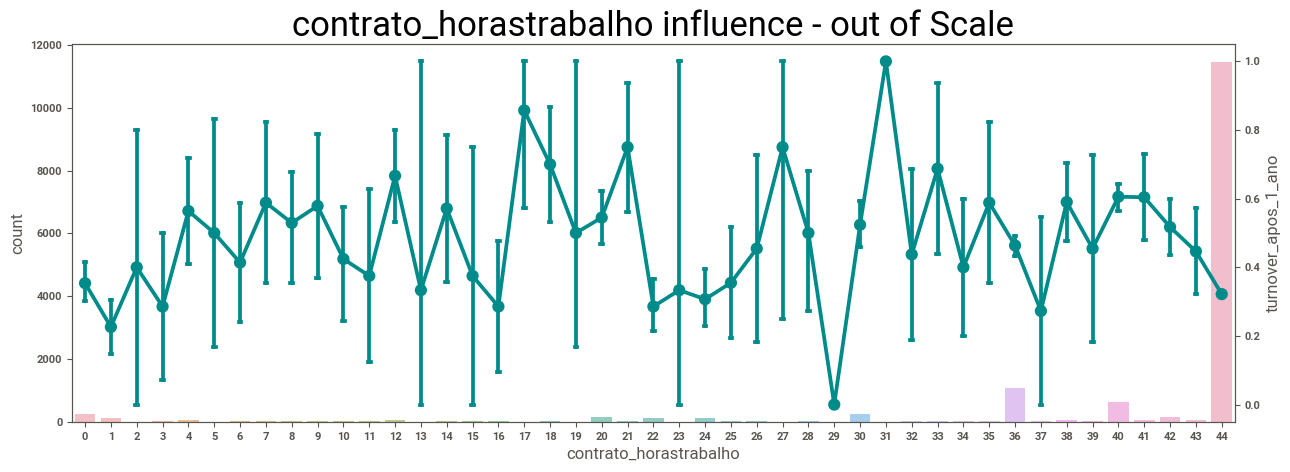

In [114]:
def work_hours_plot(data, color = 'darkcyan', hue = None): 
    
    col_name = 'contrato_horastrabalho'
    age_data = data[[col_name, 'turnover_apos_1_ano']]
    #age_data[col_name] = pd.cut(age_data[col_name],
     #                          bins=[-1, 0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44],
      #                         labels=[ 0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44])

    ax1 = sns.set_style(style=None, rc=None)

    fig, ax1 = plt.subplots(figsize=(15,5))

    sns.countplot(x=col_name, data=age_data, ax = ax1, alpha=0.6) \
                 .set_title(f'{col_name} influence - out of Scale', fontsize=25)
    

    ax2 = ax1.twinx()
    sns.pointplot(x=col_name, y='turnover_apos_1_ano',
                  dodge=0.1, capsize=.1, data=age_data, color=color, hue=hue, row=hue, ax = ax2) 
    
    
work_hours_plot(df_train)

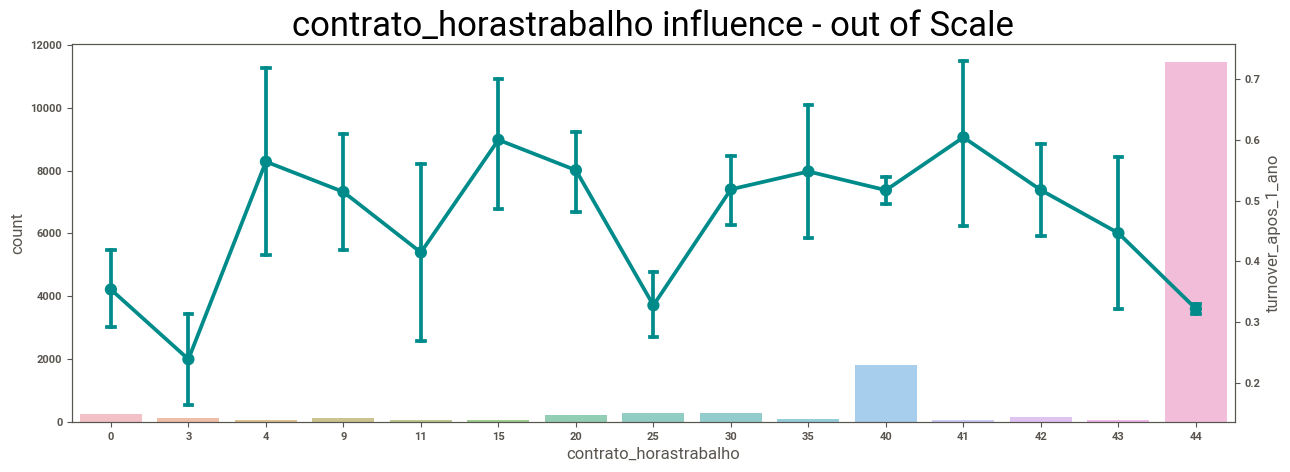

In [115]:
def work_hours_plot(data, color = 'darkcyan', hue = None): 
    
    col_name = 'contrato_horastrabalho'
    age_data = data[[col_name, 'turnover_apos_1_ano']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[-1, 0, 3, 4, 9, 11, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44],
                               labels=[ 0, 3, 4, 9, 11, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44])

    ax1 = sns.set_style(style=None, rc=None)

    fig, ax1 = plt.subplots(figsize=(15,5))

    sns.countplot(x=col_name, data=age_data, ax = ax1, alpha=0.6) \
                 .set_title(f'{col_name} influence - out of Scale', fontsize=25)
    

    ax2 = ax1.twinx()
    sns.pointplot(x=col_name, y='turnover_apos_1_ano',
                  dodge=0.1, capsize=.1, data=age_data, color=color, hue=hue, row=hue, ax = ax2) 
    
    
work_hours_plot(df_train)